In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
pip install openpyxl

## Loading augmented data (Pierre)

In [ ]:
file = '/content/drive/MyDrive/data/datacraft_data_vaccination_5g_augmented_2021_09_30.xlsx'

In [ ]:
pd.set_option('display.max_columns', None)
tweets_augmented = pd.read_excel(file, engine="openpyxl")
tweets_augmented.head()

,Unnamed: 0,pseudo,tweet,tweet_date,tweet_url,tweet_hashtags,tweet_urls,tweet_mentions,status_id,tweet_formatted,is_rt,retweeted_status_id,retweeted_screen_name,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,name,location,description,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,profile_expanded_url,community,urls_url,urls_expanded_url,validalab_score,url_domain,topic_id,topic_of_interest,topic_label,sen_label_tf,sen_score_tf,sen_polarity_tb,sen_subjectivity_tb,position_gps
0,0,(Mysteriously Unnamed),@Cheewyy4 @AiphanMarcel @nonopp4 Quand il t' i...,2020-04-05 20:21:03.0,http://twitter.com//statuses/1246895646730260488,NaN,NaN,Cheewyy4| nonopp4,1246895646730260488,@cheewyy4 @aiphanmarcel @nonopp4 quand il t im...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1.0,Ordre mondial et domination de la population,NaN,NaN,NaN,NaN,NaN
1,1,_________adaa,@umut_dkr Je t’explique : dans ce soie disant ...,2020-11-12 15:03:13.0,http://twitter.com/_________adaa/statuses/1326...,NaN,NaN,umut_dkr,1326903382662127622,@umut_dkr je t explique : dans ce soie disant ...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,ADAA 💕🇸🇳,"Paris, France",De passage 🙃,729.0,431.0,0.0,3347.0,4165.0,2020-03-27 17:58:56.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Incrédule par rapport à la Fake News,NaN,NaN,NaN,NaN,NaN
2,2,______Stan_____,RT @laurentchemla Quelqu'un a déjà réussi à fa...,2021-01-13 14:37:39.0,http://twitter.com/______Stan_____/statuses/13...,NaN,NaN,laurentchemla,1349364994165633024,rt @laurentchemla quelqu un a deja reussi a fa...,True,1.349346e+18,laurentchemla,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,Stan,"Marseille, France",Dolce Vita à Marseille. \nDiffuseur de bon pla...,509.0,468.0,22.0,18153.0,11004.0,2014-10-26 13:18:03.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE,0.617062,-0.2,-0.4,NaN
3,3,_____Aurore,RT @Lola__bos POITIERS je suis nounou pour ce ...,2020-10-13 05:07:59.0,http://twitter.com/_____Aurore/statuses/131588...,NaN,NaN,Lola__bos,1315881950004088833,rt @lola__bos poitiers je suis nounou pour ce ...,True,1.315695e+18,Lola__bos,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,aurora 🇫🇷🇮🇹,Italy,twitter is dark and full of spoilers.,475.0,353.0,12.0,66194.0,2097.0,2012-01-07 17:21:43.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,_____ilham,RT @MikeStnm_ Moi quand le gouvernement contrô...,2020-11-13 00:09:38.0,http://twitter.com/_____ilham/statuses/1327040...,NaN,NaN,MikeStnm_,1327040891404611586,rt @mikestnm_ moi quand le gouvernement contro...,True,1.326938e+18,MikeStnm_,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,Chinup,NaN,Open up ur soul show me how its fake,37.0,94.0,0.0,1265.0,1443.0,2016-11-24 19:22:51.000001,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets_augmented.shape


(193209, 45)

In [ ]:
tweets_augmented.head()

,Unnamed: 0,pseudo,tweet,tweet_date,tweet_url,tweet_hashtags,tweet_urls,tweet_mentions,status_id,tweet_formatted,is_rt,retweeted_status_id,retweeted_screen_name,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,name,location,description,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,profile_expanded_url,community,urls_url,urls_expanded_url,validalab_score,url_domain,topic_id,topic_of_interest,topic_label,sen_label_tf,sen_score_tf,sen_polarity_tb,sen_subjectivity_tb,position_gps
0,0,(Mysteriously Unnamed),@Cheewyy4 @AiphanMarcel @nonopp4 Quand il t' i...,2020-04-05 20:21:03.0,http://twitter.com//statuses/1246895646730260488,NaN,NaN,Cheewyy4| nonopp4,1246895646730260488,@cheewyy4 @aiphanmarcel @nonopp4 quand il t im...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1.0,Ordre mondial et domination de la population,NaN,NaN,NaN,NaN,NaN
1,1,_________adaa,@umut_dkr Je t’explique : dans ce soie disant ...,2020-11-12 15:03:13.0,http://twitter.com/_________adaa/statuses/1326...,NaN,NaN,umut_dkr,1326903382662127622,@umut_dkr je t explique : dans ce soie disant ...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,ADAA 💕🇸🇳,"Paris, France",De passage 🙃,729.0,431.0,0.0,3347.0,4165.0,2020-03-27 17:58:56.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Incrédule par rapport à la Fake News,NaN,NaN,NaN,NaN,NaN
2,2,______Stan_____,RT @laurentchemla Quelqu'un a déjà réussi à fa...,2021-01-13 14:37:39.0,http://twitter.com/______Stan_____/statuses/13...,NaN,NaN,laurentchemla,1349364994165633024,rt @laurentchemla quelqu un a deja reussi a fa...,True,1.349346e+18,laurentchemla,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,Stan,"Marseille, France",Dolce Vita à Marseille. \nDiffuseur de bon pla...,509.0,468.0,22.0,18153.0,11004.0,2014-10-26 13:18:03.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE,0.617062,-0.2,-0.4,NaN
3,3,_____Aurore,RT @Lola__bos POITIERS je suis nounou pour ce ...,2020-10-13 05:07:59.0,http://twitter.com/_____Aurore/statuses/131588...,NaN,NaN,Lola__bos,1315881950004088833,rt @lola__bos poitiers je suis nounou pour ce ...,True,1.315695e+18,Lola__bos,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,aurora 🇫🇷🇮🇹,Italy,twitter is dark and full of spoilers.,475.0,353.0,12.0,66194.0,2097.0,2012-01-07 17:21:43.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,_____ilham,RT @MikeStnm_ Moi quand le gouvernement contrô...,2020-11-13 00:09:38.0,http://twitter.com/_____ilham/statuses/1327040...,NaN,NaN,MikeStnm_,1327040891404611586,rt @mikestnm_ moi quand le gouvernement contro...,True,1.326938e+18,MikeStnm_,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,Chinup,NaN,Open up ur soul show me how its fake,37.0,94.0,0.0,1265.0,1443.0,2016-11-24 19:22:51.000001,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Number of communities

In [1]:
tweets_augmented.community.value_counts()

NameError: name 'tweets_augmented' is not defined

In [ ]:
tweets_augmented.columns

Index(['Unnamed: 0', 'pseudo', 'tweet', 'tweet_date', 'tweet_url',
       'tweet_hashtags', 'tweet_urls', 'tweet_mentions', 'status_id',
       'tweet_formatted', 'is_rt', 'retweeted_status_id',
       'retweeted_screen_name', 'place_url', 'place_name', 'place_full_name',
       'place_type', 'country', 'country_code', 'geo_coords', 'coords_coords',
       'bbox_coords', 'name', 'location', 'description', 'followers_count',
       'friends_count', 'listed_count', 'statuses_count', 'favourites_count',
       'account_created_at', 'profile_expanded_url', 'community', 'urls_url',
       'urls_expanded_url', 'validalab_score', 'url_domain', 'topic_id',
       'topic_of_interest', 'topic_label', 'sen_label_tf', 'sen_score_tf',
       'sen_polarity_tb', 'sen_subjectivity_tb', 'position_gps'],
      dtype='object')

In [ ]:
# New dataset 
geoloc = tweets_augmented[['pseudo','description','community', 'topic_label']]

In [ ]:
geoloc

,pseudo,description,community,topic_label
0,(Mysteriously Unnamed),NaN,NaN,Ordre mondial et domination de la population
1,_________adaa,De passage 🙃,NaN,Incrédule par rapport à la Fake News
2,______Stan_____,Dolce Vita à Marseille. \nDiffuseur de bon pla...,0.0,NaN
3,_____Aurore,twitter is dark and full of spoilers.,1.0,NaN
4,_____ilham,Open up ur soul show me how its fake,2.0,NaN
...,...,...,...,...
193204,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12.0,NaN
193205,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12.0,NaN
193206,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12.0,NaN
193207,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12.0,NaN


In [ ]:
# Fill empty descriptions with Nan
geoloc['description'].replace('', np.nan, inplace=True)
# Removing NaN from 'description'
geoloc.dropna(subset=['description'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Drop rows without community number
geoloc.dropna(subset=['community'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# community from floats to int64
geoloc.community = geoloc.community.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
geoloc

,pseudo,description,community,topic_label
2,______Stan_____,Dolce Vita à Marseille. \nDiffuseur de bon pla...,0,NaN
3,_____Aurore,twitter is dark and full of spoilers.,1,NaN
4,_____ilham,Open up ur soul show me how its fake,2,NaN
7,____Thierry____,"Aveyronnais, né à Figeac dans le Lot, demeuran...",4,NaN
8,____Thierry____,"Aveyronnais, né à Figeac dans le Lot, demeuran...",4,NaN
...,...,...,...,...
193202,ZZib69,Scandalisée par l'incompétence et le laxisme d...,12,NaN
193204,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12,NaN
193205,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12,NaN
193206,ZzNpl,Entre la NAÏVETÉ totale et le COMPLOTISME il y...,12,NaN


In [ ]:
# 'description' to string
geoloc.description = geoloc.description.astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# How many pseudo are duplicated ?
duplicate_count = len(geoloc.pseudo)-len(geoloc.pseudo.drop_duplicates()) # Original data lenght minus data length without duplicates

duplicate_count

84400

In [ ]:
# Drop the dupliacated row (to keep only one description per user per in each community)
geoloc.drop_duplicates(subset='pseudo', keep="first",inplace=True )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# communities new count
geoloc.community.value_counts()

14    5927
5     2994
4     2923
12    2737
6     2317
2     1664
17    1201
0     1130
10     953
11     853
9      745
7      558
3      487
19     446
16     414
21     313
20     306
18     227
30     225
23     184
8      157
27     148
29     145
25     140
33     104
22      89
26      86
28      63
32      59
1       54
31      52
15      28
42      27
24      25
13      24
34      20
41      17
40      16
49      15
47      13
52      11
44      10
48       9
50       9
37       9
45       8
35       7
46       7
53       6
38       6
39       6
36       4
43       4
54       3
51       2
55       2
56       2
Name: community, dtype: int64

## Search for the most frequent words in users' descriptions by community

In [ ]:
from collections import Counter

In [ ]:
import re
import string
from string import punctuation
import nltk
nltk.download('punkt')

import pandas as pd

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer

#stemmer = FrenchStemmer()


#nltk.download('punkt')
nltk.download('stopwords')

custom_stop_words = ['cest', 'nest', 'nengagent', 'toujours', 'plus', 'si', 'tout', 'être', 'sans', 'comme', 'rien', 'ig', 'yo', 'im', '•', 'ça', 'chez', 'ni', 'depuis', 
                     'où', 'ici', 'ans', 'temps', 'jaime', 'peu', 'jai', 'bien', 'trop', 'faire', 'fait', 'quand', 'tweets', 'twitter', 'tweet'
                    'non', 'aime','fait' 'quand', 'aussi', 'très', 'moins', 'rt', 'autres', 'tous', 'account', 'insta', 
                     'compte', 'follow', 'jsuis', 'jamais', 'bon', 'dont', 'fan', 'jour', 'im',  'instagram', 'fais', 'jean', 
                     'one', 'ceux','toute', 'faut', 'toutes', 'passer', 'mal', 'veut', 'veux', 'vue', 
                     'choses','quil', 'longue', 'x', 'never', 'va' , 'sa', 'wander', 'bad', 'puis', 
                     'since', 'dun',  'donc', 'dune',  'ones', 'actuellement', 'parfois', 'mainly', 'ma', 'na', 'dire', 'el', 'wa', 'beaucoup',
                     'snap'
 ]
                     
STOP_WORDS = stopwords.words('french') + stopwords.words('english') + custom_stop_words 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# removing the emojies
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [ ]:
!pip3 install spacy

In [ ]:
# French library
!python3 -m spacy download fr_core_news_md

     |████████████████████████████████| 88.6 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [ ]:
import spacy
import fr_core_news_md
nlp = spacy.load('fr_core_news_md')


In [ ]:
def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = text.casefold() #remove case for everything
    #text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r"https?://\S+", "", text) #remove hypelinks
    #text = re.sub('<.*?·>+', '', text)
    text = re.sub(r"<a[^>]*>(.*?)</a>", r"\1", text) #remove <a> tags but keep their content
    text = re.sub(r"<.*?>", " ", text) #remove html tags but keep their content
    text = re.sub(f"[{re.escape(punctuation)}]", "", text) #remove punctuation
    
    text = re.sub('\n', '', text)
    text = re.sub('«', '', text)
    text = re.sub('» ', '', text)
    text = re.sub('[’“”…]', '  ', text)
    #text = re.sub(r"[^A-Za-z0-9\s]+", "", text) # remove all special characters
    text = re.sub(r"\b[0-9]+\b\s*", "", text) # remove numbers
    text = " ".join([w for w in text.split() if w.isalpha()]) # remove non alphabetic characters
    text = ''.join(i for i in text if not i.isdigit())
    text = " ".join(text.split()) #Remove extra spaces, tabs, and line breaks
    


    text = EMOJI_PATTERN.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]
    filtered_tokens = (" ").join(tokens_without_sw)
    # french lemma with spacy
    tokens = nlp(filtered_tokens)
    tokens_lemma = [token.lemma_ for token in  tokens]
    filtered_sentence = (" ").join(tokens_lemma)

    
    text = filtered_sentence

    return text

    

In [ ]:
# Apply cleaning on descriptions
geoloc['description'] = geoloc['description'].apply(cleaning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 
categorie 0
 
          Word  Frequency
0          vie         36
1        monde         24
2          non         20
3        petit         20
4        grand         17
5         geek         16
6      pouvoir         15
7        maman         15
8   passionner         14
9       passer         14
10     amateur         14
11       music         14
12   politique         13
13          pp         13
14      social         12
 


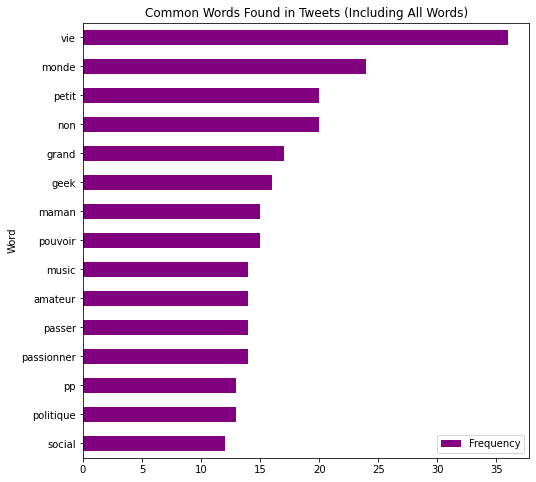

 
Most topics of the community
 
Incrédule par rapport à la Fake News                                                                      51
Puces traqueuses dans le vaccin                                                                           14
Vaccin pour mettre des  nanoparticules                                                                    13
Animaux                                                                                                   11
Humour par rapport à  la Fake News                                                                         8
Croyant de la fake news                                                                                    8
Ironie sur la fake news, moqueries                                                                         6
Hydroxicloroquine plus efficace  que le vaccin                                                             6
Assez général                                                                                  

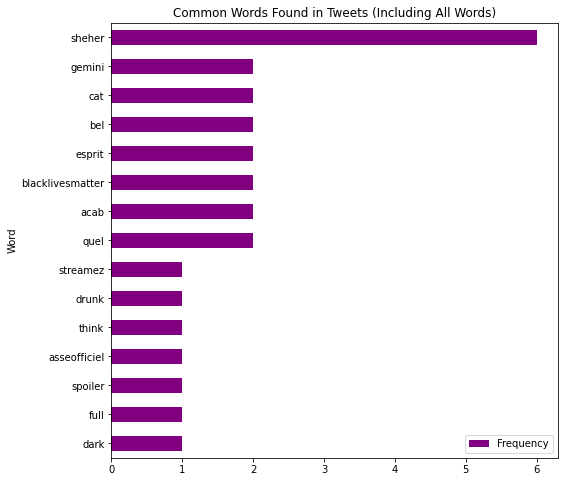

 
Most topics of the community
 
Animaux    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 2
 
                Word  Frequency
0             sheher         52
1   blacklivesmatter         36
2          infirmier         27
3                vie         26
4               stan         21
5               love         18
6              hehim         17
7              paris         16
8               like         15
9               life         15
10          médecine         14
11          étudiant         14
12           pouvoir         14
13               blm         11
14            perdre         11
 


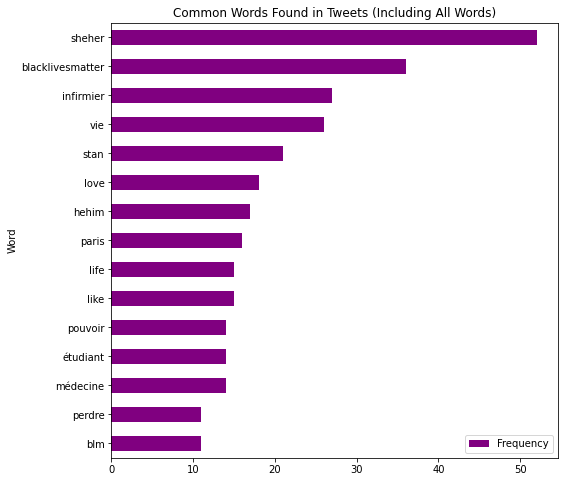

 
Most topics of the community
 
Incrédule par rapport à la Fake News                                                               29
Vaccin pour mettre des  nanoparticules                                                             10
Animaux                                                                                             5
Croyant de la fake news                                                                             4
Puces traqueuses dans le vaccin                                                                     3
Assez général                                                                                       2
Milliardaires contrôlent le monde                                                                   1
Bots                                                                                                1
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News     1
Hydroxicloroquine plus efficace  que le vaccin   

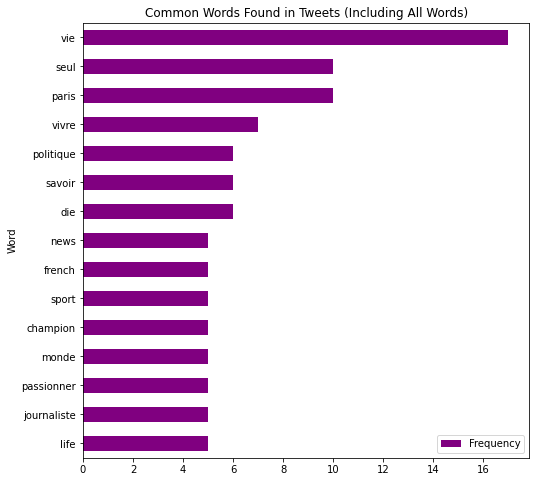

 
Most topics of the community
 
Vaccin pour mettre des  nanoparticules           6
Incrédule par rapport à la Fake News             4
Ordre mondial et domination de la population     3
Conflits d'intérêts supposés de B. Gates         2
Interrogations sur le développement du vaccin    2
Pas de reprise normal sans vaccin                2
Humour par rapport à  la Fake News               1
Animaux                                          1
Puces traqueuses dans le vaccin                  1
Assez général                                    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 4
 
         Word  Frequency
0       monde        124
1      france        110
2     pouvoir         93
3   politique         93
4     liberté         91
5         vie         89
6      contre         81
7        anti         74
8         non         66
9       libre         62
10     vérité         52
11     gauche         49
12    citoyen         48
13   français         47
14   

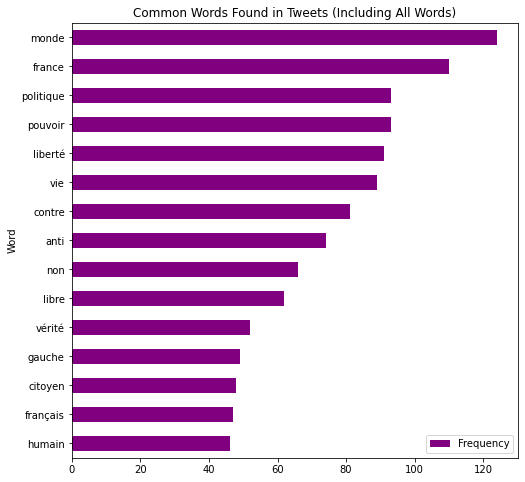

 
Most topics of the community
 
Puces traqueuses dans le vaccin                                                                           57
Hydroxicloroquine plus efficace  que le vaccin                                                            37
Vaccin pour mettre des  nanoparticules                                                                    36
Incrédule par rapport à la Fake News                                                                      32
Assez général                                                                                             30
Pas de reprise normal sans vaccin                                                                         25
Croyant de la fake news                                                                                   25
Ordre mondial et domination de la population                                                              25
Interrogations sur les motivations de Bill Gates                                               

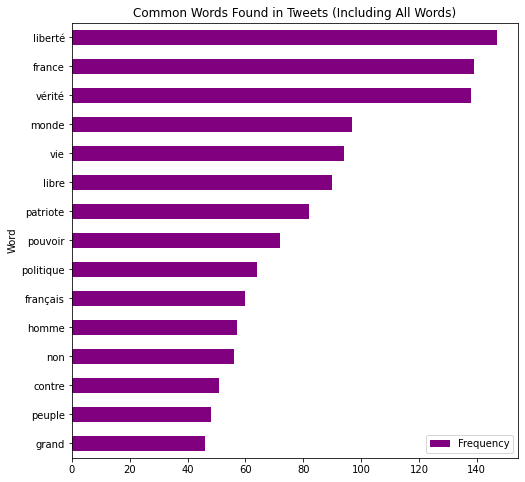

 
Most topics of the community
 
Puces traqueuses dans le vaccin                                                                           43
Incrédule par rapport à la Fake News                                                                      30
Assez général                                                                                             28
Interrogations sur le développement du vaccin                                                             27
Hydroxicloroquine plus efficace  que le vaccin                                                            26
Pas de reprise normal sans vaccin                                                                         22
Vaccination permettra d''éliminer\nUne partie de la pop                                                   20
Humour par rapport à  la Fake News                                                                        19
Vaccin pour mettre des  nanoparticules                                                         

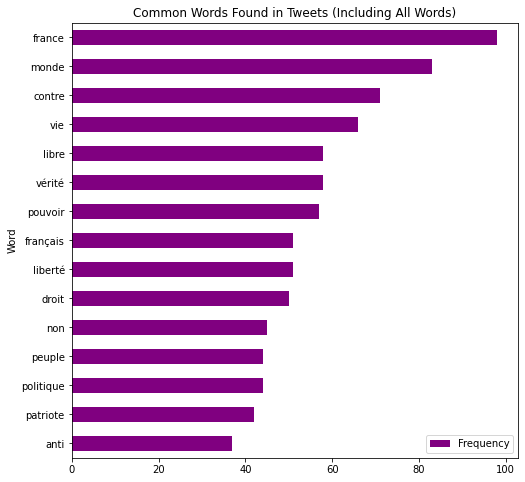

 
Most topics of the community
 
Assez général                                                                                             31
Puces traqueuses dans le vaccin                                                                           29
Incrédule par rapport à la Fake News                                                                      25
Vaccination permettra d''éliminer\nUne partie de la pop                                                   24
Pas de reprise normal sans vaccin                                                                         23
Hydroxicloroquine plus efficace  que le vaccin                                                            23
Croyant de la fake news                                                                                   22
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens                                    21
Vaccin pour mettre des  nanoparticules                                                         

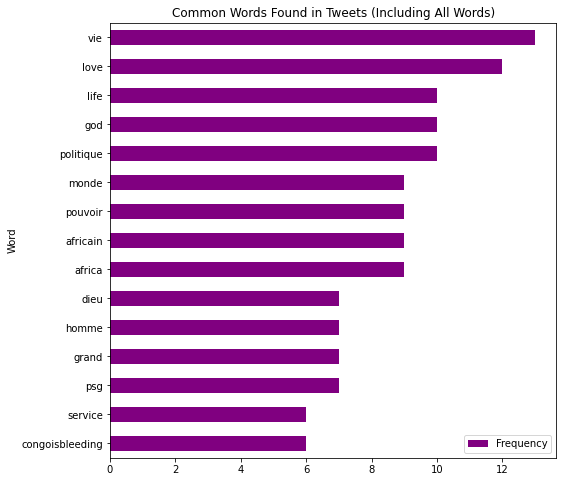

 
Most topics of the community
 
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens                             7
Assez général                                                                                      6
Action en Afrique de la fondation Gates                                                            5
Vaccin pour mettre des  nanoparticules                                                             4
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News    3
Hydroxicloroquine plus efficace  que le vaccin                                                     3
Puces traqueuses dans le vaccin                                                                    2
Incrédule par rapport à la Fake News                                                               2
Animaux                                                                                            2
Vaccination permettra d''éliminer\nUne partie de la pop   

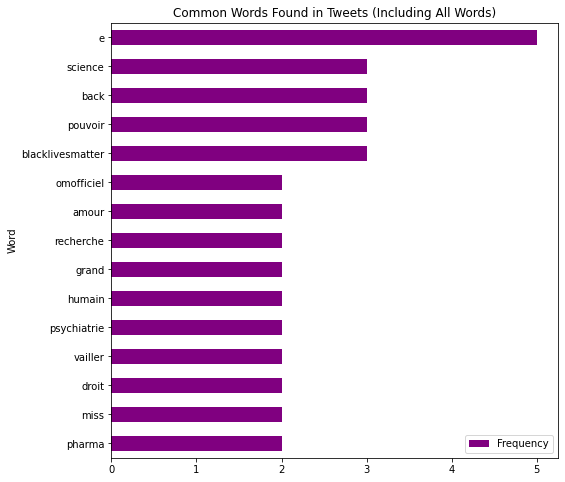

 
Most topics of the community
 
Incrédule par rapport à la Fake News      1
Vaccin pour mettre des  nanoparticules    1
Humour par rapport à  la Fake News        1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 9
 
         Word  Frequency
0         vie         16
1         jeu         15
2   politique         12
3       droit         12
4       paris         11
5      perdre         10
6       vidéo         10
7       heure          9
8         art          9
9     pouvoir          9
10     french          9
11    devenir          9
12     sheher          8
13    amateur          8
14     master          8
 


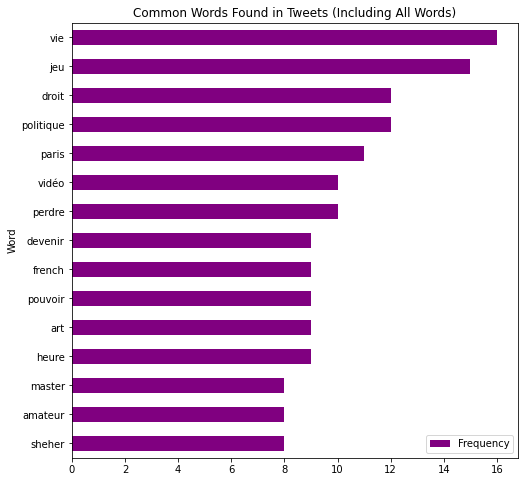

 
Most topics of the community
 
Incrédule par rapport à la Fake News                                                               22
Vaccin pour mettre des  nanoparticules                                                              8
Puces traqueuses dans le vaccin                                                                     7
Humour par rapport à  la Fake News                                                                  3
Croyant de la fake news                                                                             3
Assez général                                                                                       2
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News     2
Milliardaires contrôlent le monde                                                                   1
Interrogations sur le développement du vaccin                                                       1
Interrogations sur les motivations de Bill Gates 

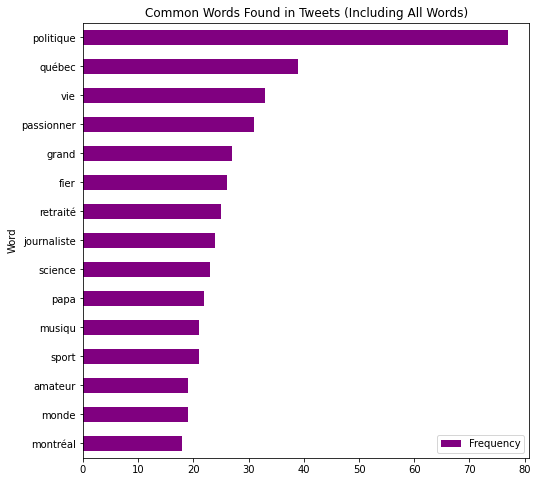

 
Most topics of the community
 
Incrédule par rapport à la Fake News                                                               21
Puces traqueuses dans le vaccin                                                                    14
Assez général                                                                                      12
Vaccin pour mettre des  nanoparticules                                                             12
Ironie sur la fake news, moqueries                                                                 11
Humour par rapport à  la Fake News                                                                  7
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News     7
Ordre mondial et domination de la population                                                        6
Action en Afrique de la fondation Gates                                                             6
Interrogations sur les motivations de Bill Gates 

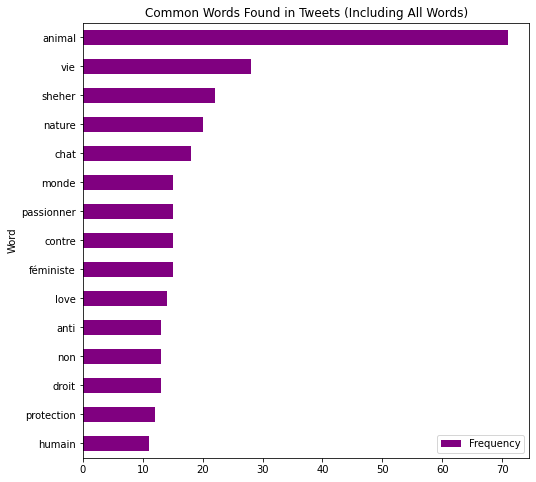

 
Most topics of the community
 
Animaux                                                                                            25
Puces traqueuses dans le vaccin                                                                     6
Incrédule par rapport à la Fake News                                                                6
Ordre mondial et domination de la population                                                        4
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens                              3
Interrogations sur les motivations de Bill Gates                                                    3
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News     3
Vaccin pour mettre des  nanoparticules                                                              2
Ironie sur la fake news, moqueries                                                                  2
Croyant de la fake news                          

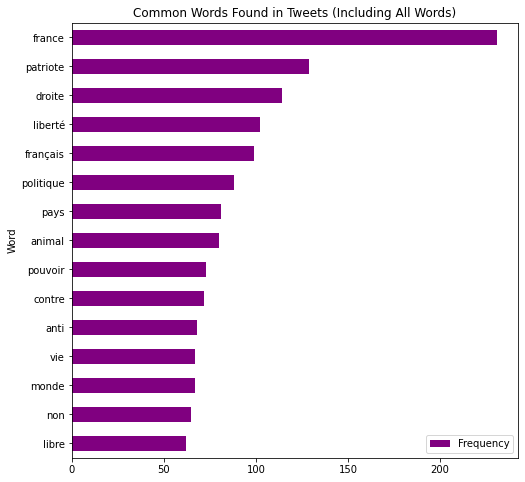

 
Most topics of the community
 
Puces traqueuses dans le vaccin                                                                           35
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens                                    27
Incrédule par rapport à la Fake News                                                                      22
Ordre mondial et domination de la population                                                              22
Interrogations sur le développement du vaccin                                                             20
Assez général                                                                                             20
Humour par rapport à  la Fake News                                                                        17
Hydroxicloroquine plus efficace  que le vaccin                                                            16
Vaccin pour mettre des  nanoparticules                                                         

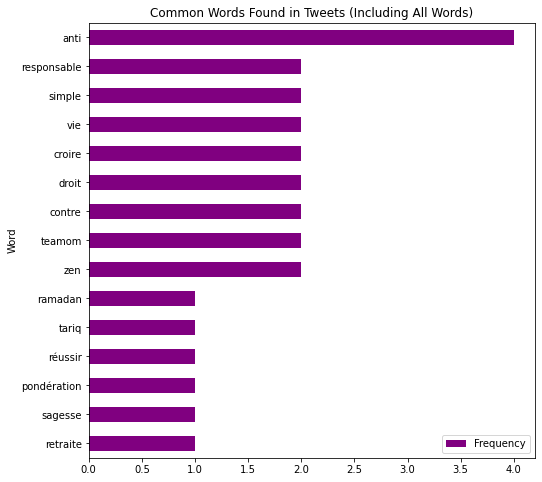

 
Most topics of the community
 
Incrédule par rapport à la Fake News                1
Interrogations sur les motivations de Bill Gates    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 14
 
           Word  Frequency
0     politique        190
1   journaliste        174
2       science        151
3         monde        144
4           vie        135
5        france        119
6    passionner        110
7        contre         94
8         grand         93
9       pouvoir         93
10         anti         92
11        paris         92
12     français         83
13    président         82
14         geek         78
 


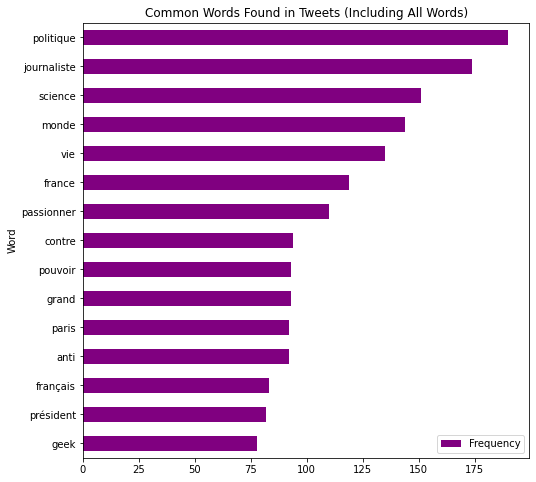

 
Most topics of the community
 
Incrédule par rapport à la Fake News                                                                      211
Puces traqueuses dans le vaccin                                                                            75
Assez général                                                                                              55
Vaccin pour mettre des  nanoparticules                                                                     47
Ironie sur la fake news, moqueries                                                                         38
Humour par rapport à  la Fake News                                                                         36
Interrogations sur les motivations de Bill Gates                                                           36
Croyant de la fake news                                                                                    26
Ordre mondial et domination de la population                                           

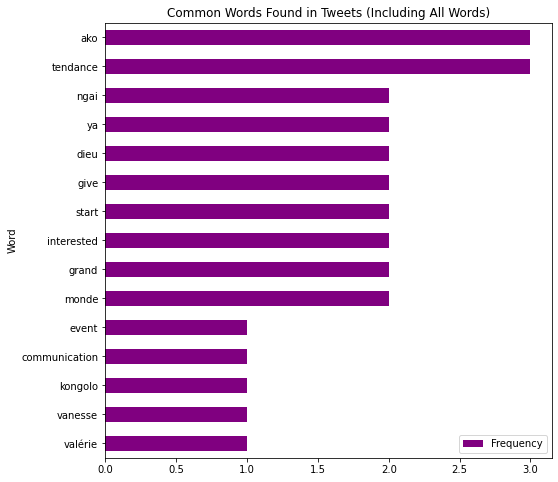

 
Most topics of the community
 
Ordre mondial et domination de la population                                                       1
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News    1
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens                             1
Vaccination permettra d''éliminer\nUne partie de la pop                                            1
Interrogations sur les motivations de Bill Gates                                                   1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 16
 
             Word  Frequency
0         digital         20
1      innovation         18
2            tech         17
3     journaliste         17
4             web         15
5            geek         13
6   communication         12
7      transfonum         12
8       politique         12
9            love         12
10      marketing         11
11   entrepreneur         10
12     

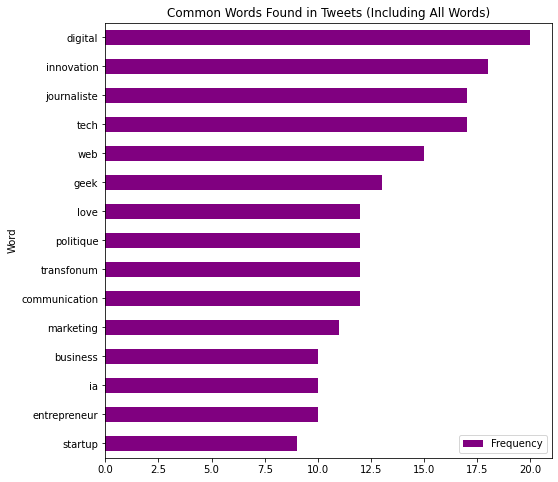

 
Most topics of the community
 
Pas de reprise normal sans vaccin                                                                         23
Conflits d'intérêts supposés de B. Gates                                                                  19
Incrédule par rapport à la Fake News                                                                      12
Hydroxicloroquine plus efficace  que le vaccin                                                             5
Action en Afrique de la fondation Gates                                                                    5
Vaccination permettra d''éliminer\nUne partie de la pop                                                    4
Assez général                                                                                              4
Vaccin pour mettre des  nanoparticules                                                                     3
Humour par rapport à  la Fake News                                                             

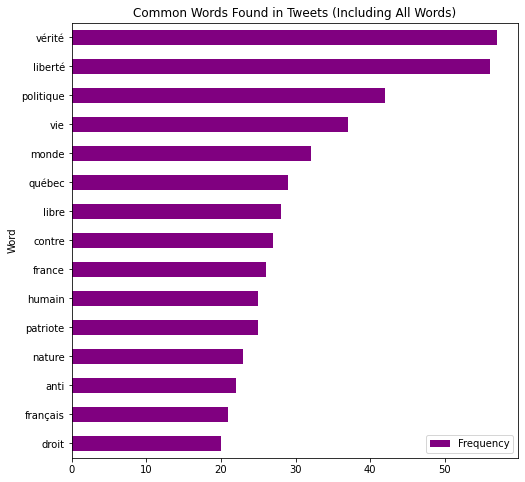

 
Most topics of the community
 
Puces traqueuses dans le vaccin                                                                           21
Interrogations sur les motivations de Bill Gates                                                          19
Assez général                                                                                             17
Hydroxicloroquine plus efficace  que le vaccin                                                            16
Incrédule par rapport à la Fake News                                                                      14
Ordre mondial et domination de la population                                                              13
Interrogations sur le développement du vaccin                                                             13
Ironie sur la fake news, moqueries                                                                        12
Vaccination permettra d''éliminer\nUne partie de la pop                                        

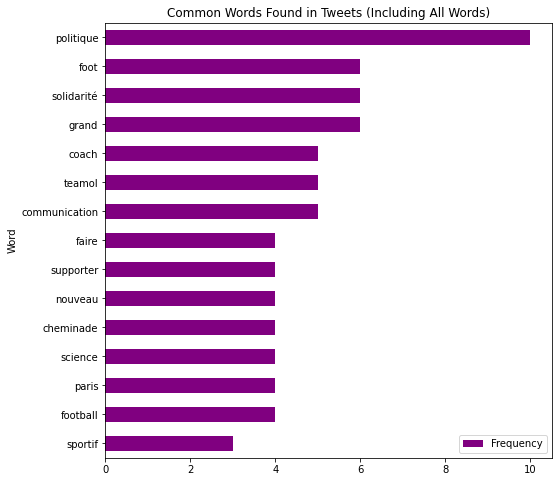

 
Most topics of the community
 
Incrédule par rapport à la Fake News              6
Assez général                                     6
Hydroxicloroquine plus efficace  que le vaccin    1
Vaccin pour mettre des  nanoparticules            1
Puces traqueuses dans le vaccin                   1
Ordre mondial et domination de la population      1
Animaux                                           1
Ironie sur la fake news, moqueries                1
Interrogations sur le développement du vaccin     1
Croyant de la fake news                           1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 19
 
         Word  Frequency
0         vie         14
1       droit         12
2      avocat         11
3   féministe         10
4     pouvoir         10
5   politique         10
6      france         10
7     science          9
8          pp          8
9       monde          7
10     perdre          7
11   militant          7
12    engager          7
13        web      

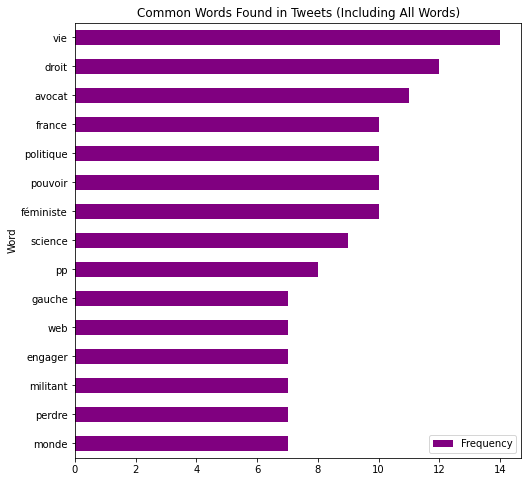

 
Most topics of the community
 
Incrédule par rapport à la Fake News                      13
Ordre mondial et domination de la population               3
Croyant de la fake news                                    2
Milliardaires contrôlent le monde                          2
Humour par rapport à  la Fake News                         2
Assez général                                              2
Ironie sur la fake news, moqueries                         2
Marquage des populations                                   2
Vaccin pour mettre des  nanoparticules                     1
Pas de reprise normal sans vaccin                          1
Vaccin contre la polio réalisé par la fondation Gates      1
Conflits d'intérêts supposés de B. Gates                   1
Comptes de bots                                            1
Action en Afrique de la fondation Gates                    1
Puces traqueuses dans le vaccin                            1
Interrogations sur le développement du vaccin       

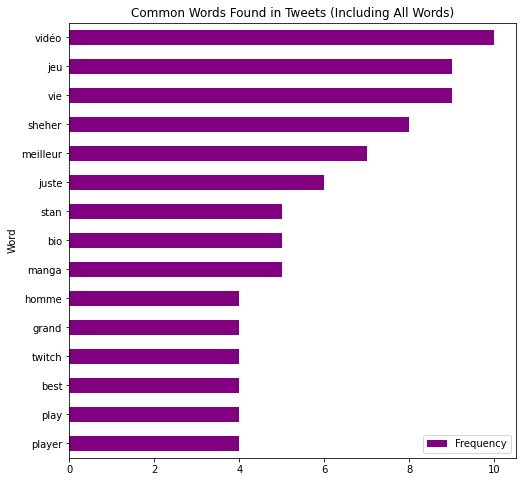

 
Most topics of the community
 
Vaccin pour mettre des  nanoparticules          3
Puces traqueuses dans le vaccin                 2
Ordre mondial et domination de la population    1
Incrédule par rapport à la Fake News            1
Croyant de la fake news                         1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 21
 
             Word  Frequency
0             vie         16
1           monde         14
2       politique         10
3     journaliste         10
4          gauche          9
5       président          6
6          nature          6
7   partiradicalg          6
8        lexpress          5
9          animal          5
10          droit          5
11          grand          5
12            mot          5
13        liberté          5
14           news          5
 


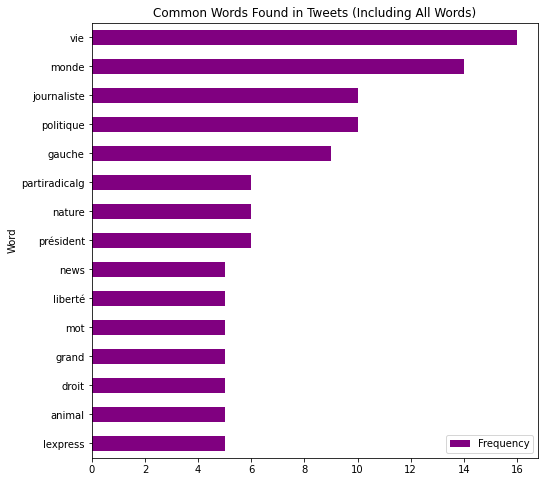

 
Most topics of the community
 
Incrédule par rapport à la Fake News                                                               5
Assez général                                                                                      5
Puces traqueuses dans le vaccin                                                                    4
Vaccin pour mettre des  nanoparticules                                                             4
Ordre mondial et domination de la population                                                       3
Hydroxicloroquine plus efficace  que le vaccin                                                     3
Milliardaires contrôlent le monde                                                                  2
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News    2
Croyant de la fake news                                                                            2
Manipulation de la fondation\nGates vis-a-vis des gouverne

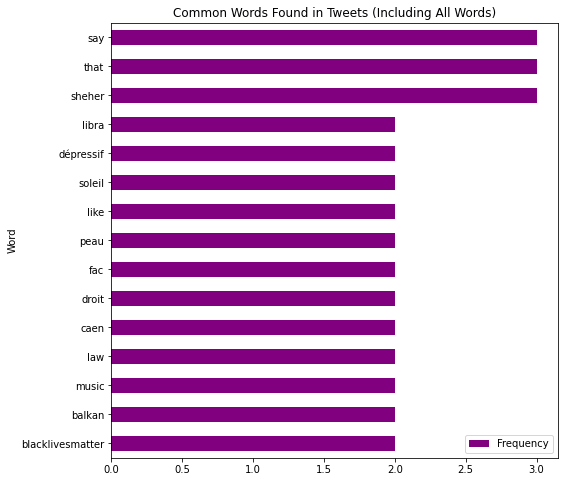

 
Most topics of the community
 
Animaux    3
Name: topic_label, dtype: int64
 
      ********************
 
categorie 23
 
     Word  Frequency
0       e         57
1      di         56
2     non         40
3       è         29
4     che         27
5     per         22
6    sono         12
7    come         11
8     una         10
9      da         10
10  tutti          9
11   vita          8
12    del          8
13    con          8
14    nel          7
 


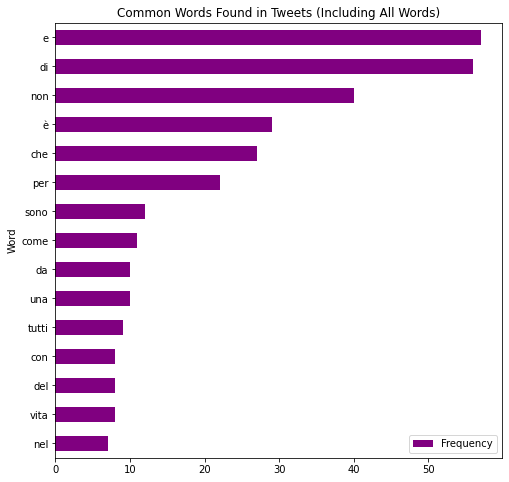

 
Most topics of the community
 
Assez général                                    2
Milliardaires contrôlent le monde                1
Puces traqueuses dans le vaccin                  1
Interrogations sur le développement du vaccin    1
Croyant de la fake news                          1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 24
 
              Word  Frequency
0             life          3
1             peak          2
2            truth          2
3    freemindradio          2
4     disobedience          2
5             lost          1
6             vibe          1
7         attracts          1
8            tribe          1
9          liberty          1
10      enthusiast          1
11  neetworldorder          1
12     drutangclan          1
13            real          1
14           three          1
 


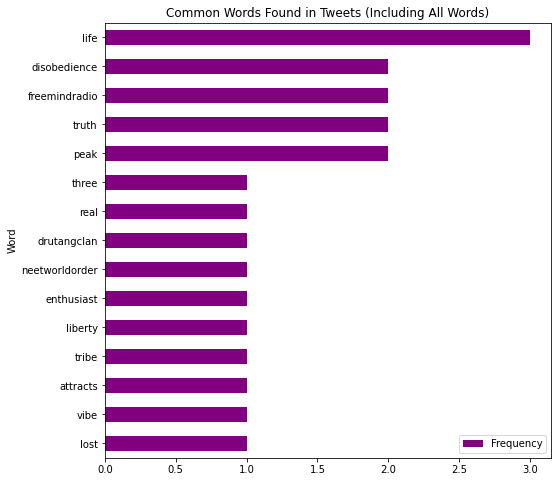

 
Most topics of the community
 
Rapport de Robert Kennedy Jr sur Bill Gates    1
Animaux                                        1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 25
 
          Word  Frequency
0      science         13
1    biologist          8
2     research          8
3     director          7
4       france          6
5      biology          6
6          phd          6
7        paris          6
8   university          6
9    scientist          5
10        open          5
11  researcher          4
12     postdoc          4
13        prof          4
14       using          4
 


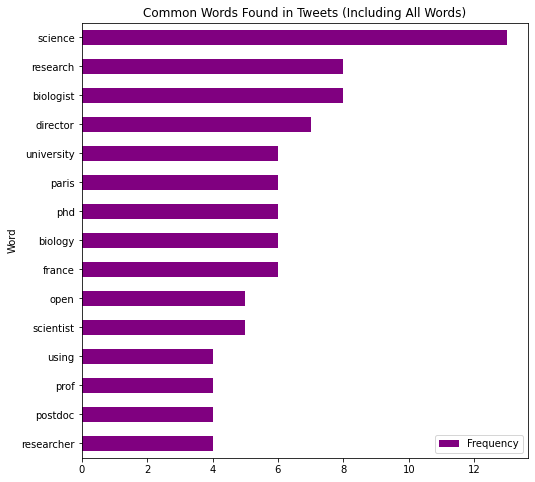

 
Most topics of the community
 
Vaccin pour mettre des  nanoparticules                                                             2
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News    1
Incrédule par rapport à la Fake News                                                               1
Comptes de bots                                                                                    1
Interrogations sur le développement du vaccin                                                      1
Interrogations sur les motivations de Bill Gates                                                   1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 26
 
         Word  Frequency
0       monde          4
1          fc          3
2       heure          3
3       piece          2
4        agir          2
5    histoire          2
6         jul          2
7      emette          1
8        lone          1
9        wolf          1
10      

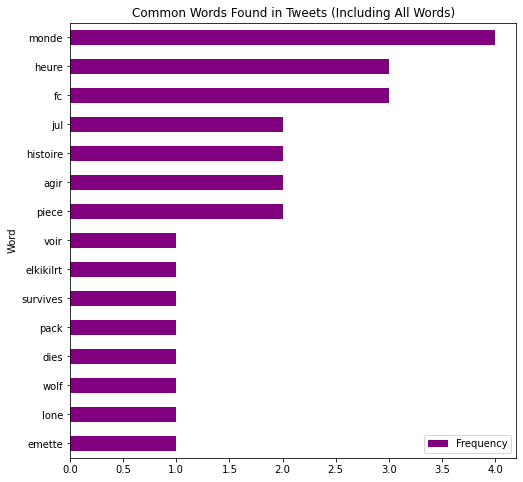

 
Most topics of the community
 
Animaux                            2
Puces traqueuses dans le vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 27
 
            Word  Frequency
0      politique          8
1        science          7
2   entrepreneur          6
3            art          6
4        manager          5
5           dieu          5
6         france          5
7      congolais          5
8          congo          5
9            rdc          5
10      national          4
11    passionner          4
12       culture          4
13     ingénieur          4
14        africa          4
 


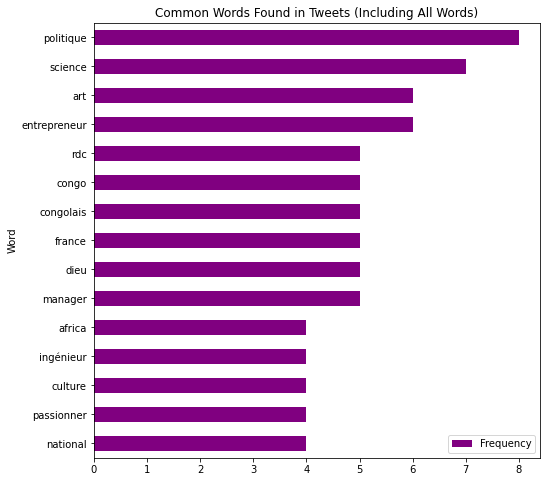

 
Most topics of the community
 
Assez général                                                             4
Incrédule par rapport à la Fake News                                      2
Hydroxicloroquine plus efficace  que le vaccin                            2
Humour par rapport à  la Fake News                                        2
Action en Afrique de la fondation Gates                                   2
Interrogations sur le développement du vaccin                             1
Vaccin pour mettre des  nanoparticules                                    1
Vaccination permettra d''éliminer\nUne partie de la pop                   1
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens    1
Ironie sur la fake news, moqueries                                        1
Pas de reprise normal sans vaccin                                         1
Interrogations sur les motivations de Bill Gates                          1
Name: topic_label, dtype: int64
 
      ***************

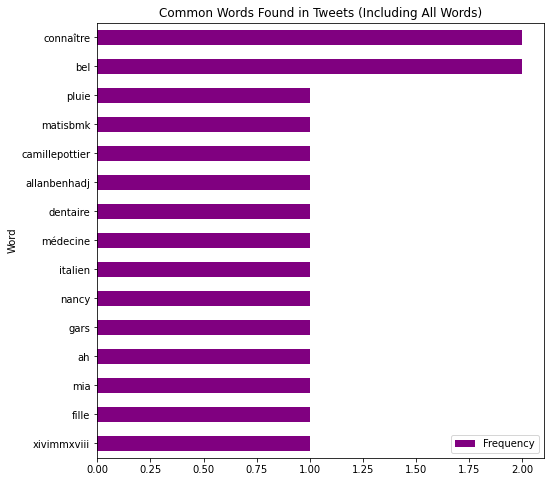

 
Most topics of the community
 
Series([], Name: topic_label, dtype: int64)
 
      ********************
 
categorie 29
 
         Word  Frequency
0   politique         12
1         vie         12
2      france          4
3       music          4
4     science          4
5     finance          4
6      french          3
7       sport          3
8         bon          3
9      nature          3
10       deux          3
11   français          3
12       sexe          3
13   officiel          3
14    liberté          3
 


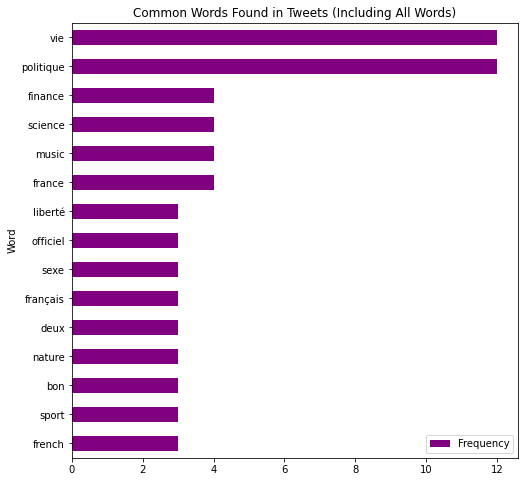

 
Most topics of the community
 
Puces traqueuses dans le vaccin                                                                           5
Brevets sur les vaccins du covid  (avant la sortie des vaccins ?)\nBoris Jonhson qui a rencontré Gates    2
Vaccination permettra d''éliminer\nUne partie de la pop                                                   2
Incrédule par rapport à la Fake News                                                                      2
Ordre mondial et domination de la population                                                              2
Assez général                                                                                             2
Milliardaires contrôlent le monde                                                                         1
Action en Afrique de la fondation Gates                                                                   1
Interrogations sur les motivations de Bill Gates                                                       

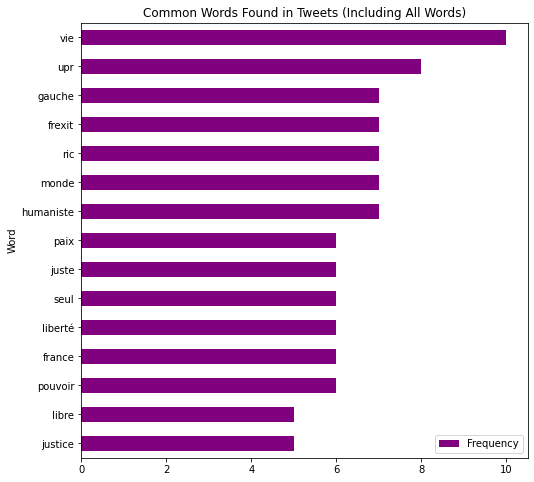

 
Most topics of the community
 
Vaccin pour mettre des  nanoparticules                                                                    4
Marquage des populations                                                                                  3
Assez général                                                                                             3
Puces traqueuses dans le vaccin                                                                           3
Incrédule par rapport à la Fake News                                                                      3
Action en Afrique de la fondation Gates                                                                   2
Brevets sur les vaccins du covid  (avant la sortie des vaccins ?)\nBoris Jonhson qui a rencontré Gates    2
Conflits d'intérêts supposés de B. Gates                                                                  1
Pas de reprise normal sans vaccin                                                                      

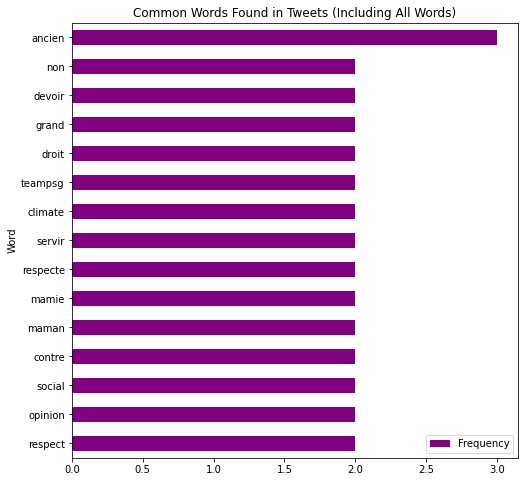

 
Most topics of the community
 
Puces traqueuses dans le vaccin                                           3
Croyant de la fake news                                                   3
Incrédule par rapport à la Fake News                                      1
Animaux                                                                   1
Pas de reprise normal sans vaccin                                         1
Ordre mondial et domination de la population                              1
Actions de la fondation Gates \nEn Afrique aurait tué beaucoup de gens    1
Vaccination permettra d''éliminer\nUne partie de la pop                   1
Hydroxicloroquine plus efficace  que le vaccin                            1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 32
 
     Word  Frequency
0     van         12
1      op          9
2      ik          9
3    niet          8
4     een          8
5     pvv          7
6     dat          6
7     pro          5
8     het       

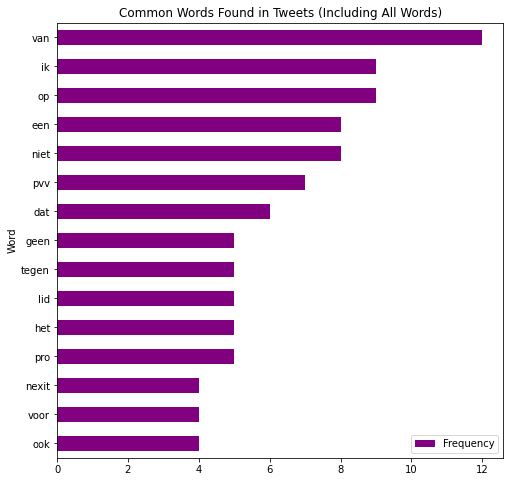

 
Most topics of the community
 
Brevets sur les vaccins du covid  (avant la sortie des vaccins ?)\nBoris Jonhson qui a rencontré Gates    5
Même tweet avec tous ses retweet                                                                          1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 33
 
            Word  Frequency
0           life         10
1            god          9
2   conservative          8
3           maga          8
4          truth          7
5        support          7
6          trump          6
7         people          6
8      christian          6
9        patriot          5
10          free          5
11       freedom          5
12        father          5
13        christ          5
14        parler          5
 


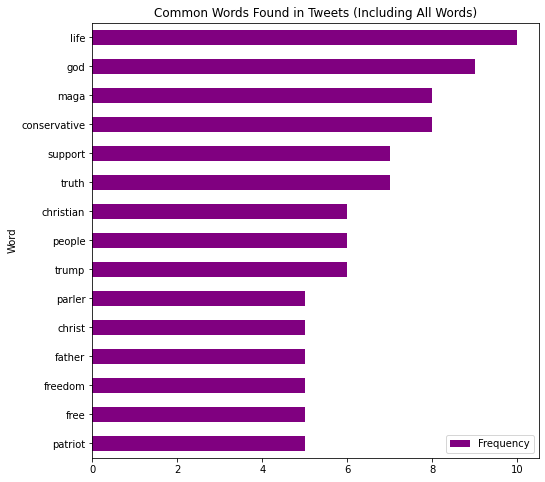

 
Most topics of the community
 
Comptes de bots                      1
Pas de reprise normal sans vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 34
 
          Word  Frequency
0          vie          3
1         tech          2
2       letemp          2
3   passionner          2
4           pc          2
5         love          2
6    extension          2
7     vendetta          1
8   revolution          1
9       justic          1
10    retroman          1
11     bestest          1
12   decadesbe          1
13       actor          1
14   spectator          1
 


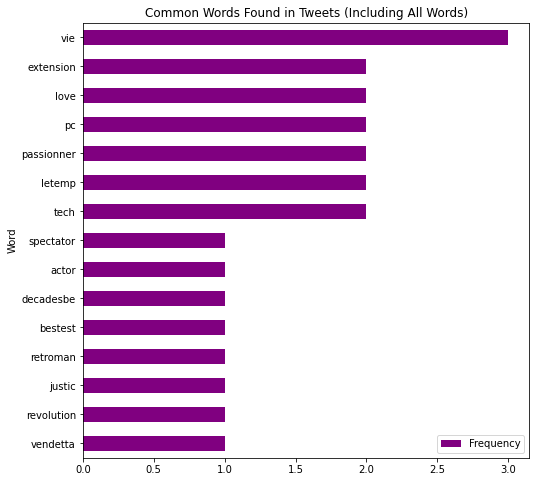

 
Most topics of the community
 
Interrogations sur le développement du vaccin    1
Conflits d'intérêts supposés de B. Gates         1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 35
 
               Word  Frequency
0     cybersecurity          2
1            perder          1
2           cordura          1
3               ant          1
4        injusticia          1
5        corrupción          1
6          judicial          1
7     whistleblower          1
8   noalaleymordaza          1
9        ceofounder          1
10       blockchain          1
11       leadership          1
12            named          1
13              top          1
14      influencers          1
 


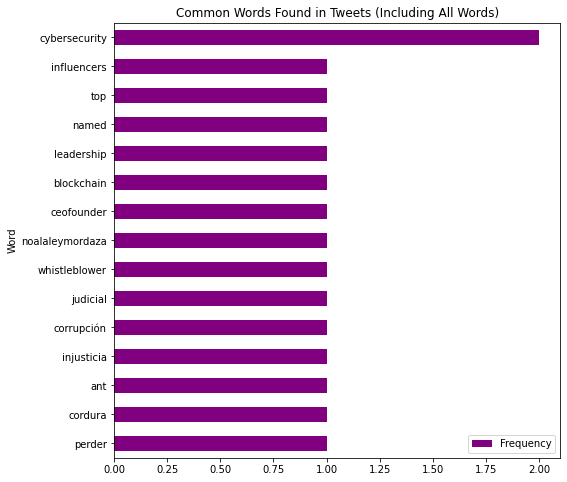

 
Most topics of the community
 
Comptes de bots    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 36
 
          Word  Frequency
0      michael          1
1      jackson          1
2         life          1
3         seen          1
4       divine          1
5     everyone          1
6         grow          1
7        wings          1
8       groups          1
9        lists          1
10        porn          1
11        seul          1
12  révolution          1
13    possible          1
14    dessayer          1
 


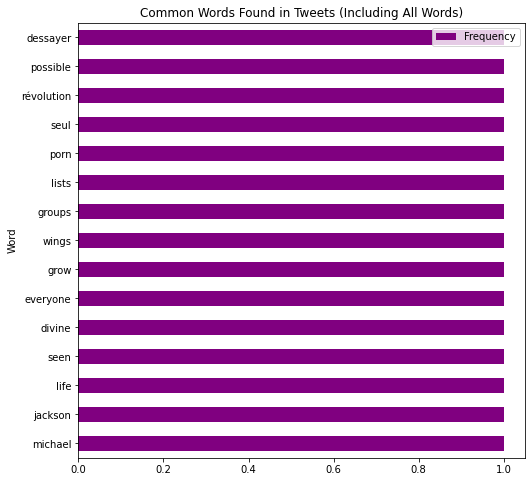

 
Most topics of the community
 
Assez général                                                                                             1
Brevets sur les vaccins du covid  (avant la sortie des vaccins ?)\nBoris Jonhson qui a rencontré Gates    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 37
 
           Word  Frequency
0          akan          1
1          côte          1
2       divoire          1
3         kongo          1
4           rdc          1
5      ɔdɔminga          1
6          dzeu          1
7        tchoya          1
8   akanhistory          1
9        malien          1
10        court          1
11    sankarist          1
12      amateur          1
13      lecture          1
14  travaillant          1
 


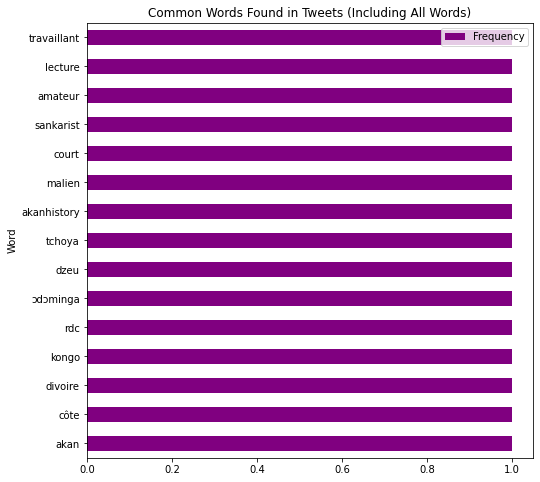

 
Most topics of the community
 
Croyant de la fake news    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 38
 
                   Word  Frequency
0            passionner          2
1                   jeu          2
2                 vidéo          2
3              streamer          1
4           multigaming          1
5   followersaventurier          1
6                twitch          1
7           explorateur          1
8                 monde          1
9             genrecode          1
10           parrainage          1
11               shadow          1
12               moitié          1
13            ikiliadiv          1
14                rétro          1
 


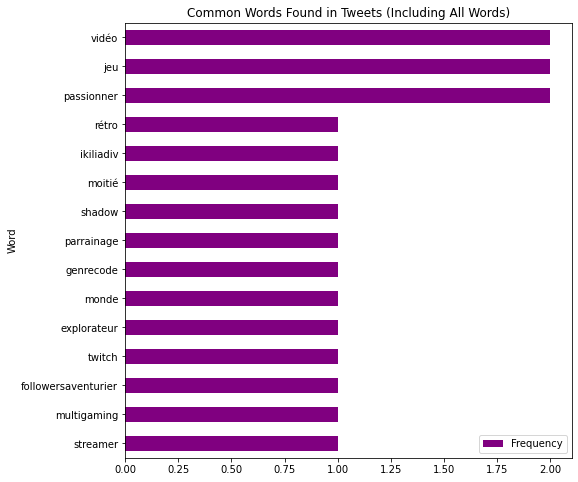

 
Most topics of the community
 
Series([], Name: topic_label, dtype: int64)
 
      ********************
 
categorie 39
 
           Word  Frequency
0        animal          3
1         santé          2
2     recherche          2
3       science          2
4       animals          2
5    technicien          1
6   vétérinaire          1
7     formateur          1
8            sg          1
9         gtvci          1
10    fondateur          1
11  ambassadeur          1
12  amrinsights          1
13     quelquun          1
14   entretemps          1
 


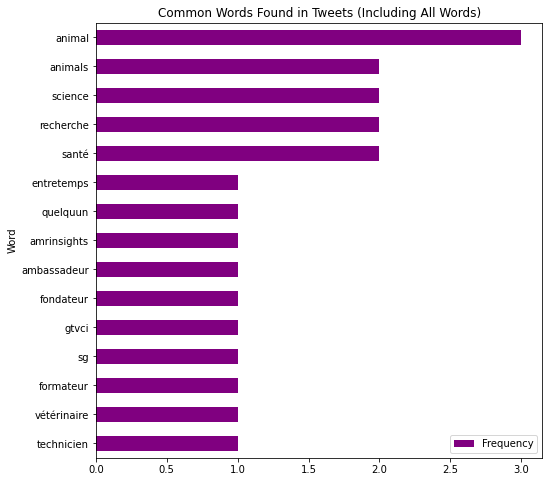

 
Most topics of the community
 
Interrogations sur le développement du vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 40
 
       Word  Frequency
0     great          3
1     party          2
2   atlanta          2
3      fool          2
4      know          2
5     bleep          2
6      take          2
7     photo          2
8    accept          2
9   blessed          1
10     pass          1
11   others          1
12  reached          1
13    gmail          1
14     mean          1
 


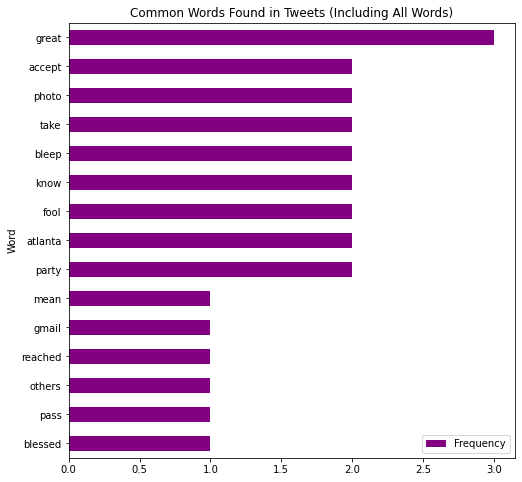

 
Most topics of the community
 
Pas de reprise normal sans vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 41
 
             Word  Frequency
0       numérique          2
1          social          2
2          membre          2
3          veille          1
4         charger          1
5   communication          1
6    reconversion          1
7           écrit          1
8         traduit          1
9         souvent          1
10        coédite          1
11         visage          1
12           vert          1
13      poufiasse          1
14           fond          1
 


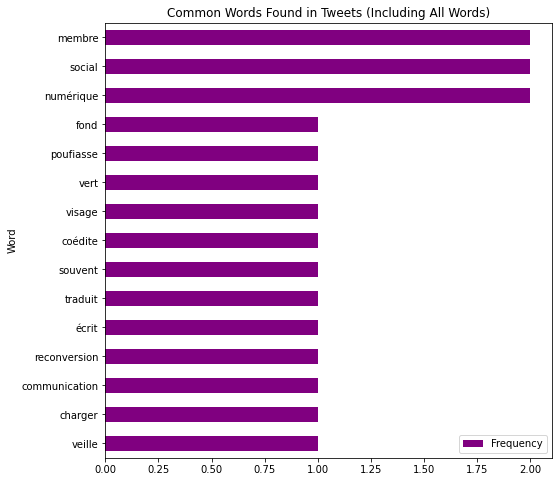

 
Most topics of the community
 
Incrédule par rapport à la Fake News    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 42
 
            Word  Frequency
0         israel          4
1       business          3
2          proud          3
3       politics          3
4           good          3
5         rights          3
6            jew          2
7          rabbi          2
8        zionist          2
9            ceo          2
10      american          2
11          best          2
12  endorsements          2
13       english          2
14          also          2
 


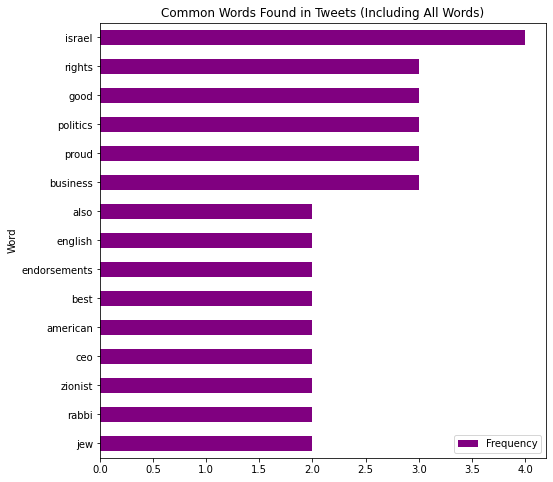

 
Most topics of the community
 
Appels à la révolte    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 43
 
                        Word  Frequency
0                       part          1
1                 lévolution          1
2           précurseurdemain          1
3                merveilleux          1
4                   commence          1
5   maintenantsystèmeinutile          1
6             régimeobsolète          1
7                    tamazga          1
8              ingouvernable          1
9                     adepte          1
10                    gandhi          1
11                     philo          1
12                   science          1
13                   service          1
14                 lhumanite          1
 


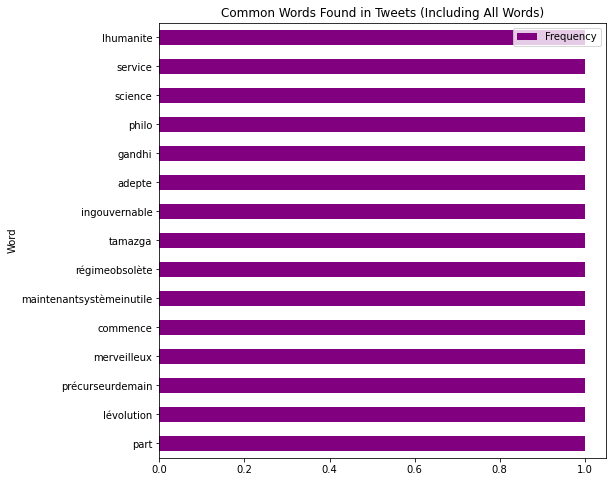

 
Most topics of the community
 
Series([], Name: topic_label, dtype: int64)
 
      ********************
 
categorie 44
 
                 Word  Frequency
0                  कल          3
1             eminent          2
2   destroytheaadhaar          2
3                 men          1
4              rights          1
5            activist          1
6                  sr          1
7            advocate          1
8                  आज          1
9            disciple          1
10                ser          1
11               shri          1
12          asharamji          1
13               bapu          1
14           traveler          1
 


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 

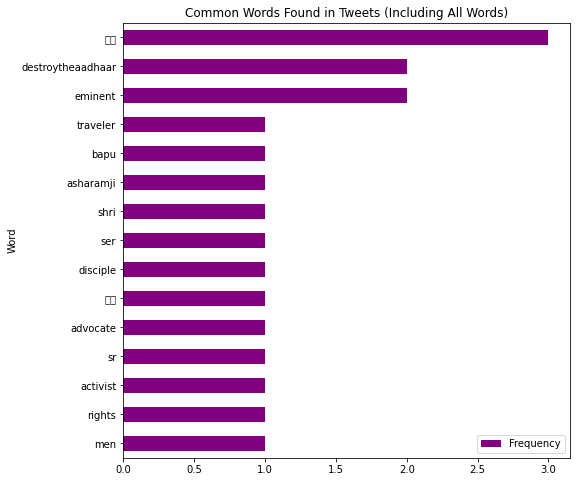

 
Most topics of the community
 
Les vaccinés sont du bétail    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 45
 
           Word  Frequency
0    passionner          2
1         sport          2
2      software          2
3      senegalo          1
4      marocain          1
5       catalan          1
6          cœur          1
7        absolu          1
8            fc          1
9     barcelone          1
10  journaliste          1
11    animateur          1
12        radio          1
13      concert          1
14    festivals          1
 


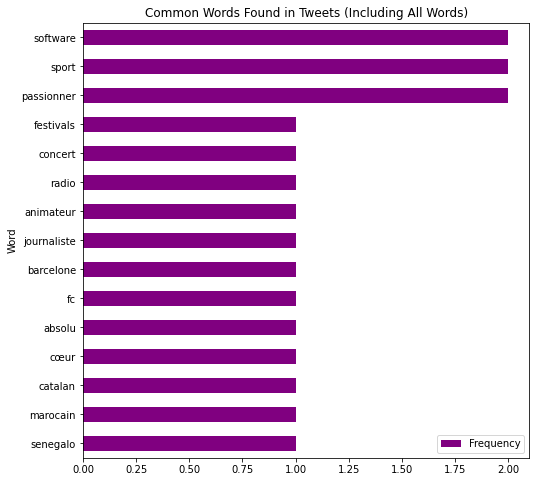

 
Most topics of the community
 
Pas de reprise normal sans vaccin     1
Humour par rapport à  la Fake News    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 46
 
                                                 Word  Frequency
0                                             rebelle          2
1                                              france          1
2                                   frexitislamophobe          1
3                                       racaillophobe          1
4                                                team          1
5                                  jesoutienslapolice          1
6                                           principal          1
7                                              frexit          1
8                                        imperfection          1
9                                          existerion          1
10                                            hawking          1
11                           

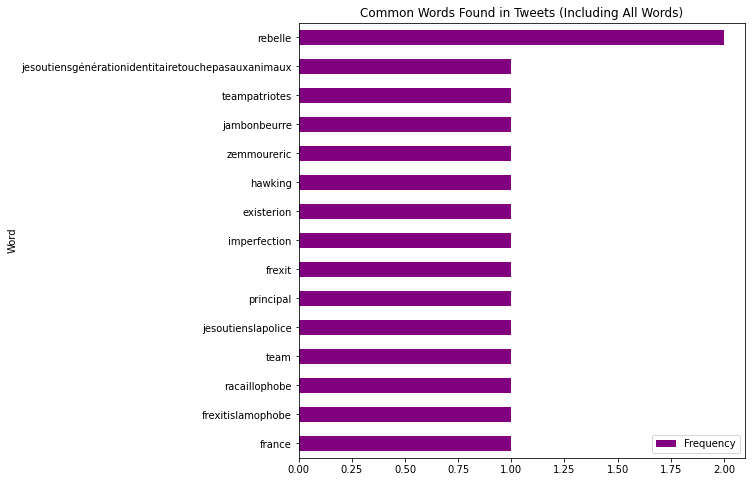

 
Most topics of the community
 
Puces traqueuses dans le vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 47
 
         Word  Frequency
0      elohim          3
1     raelian          2
2    download          2
3      sexual          2
4        love          1
5     freedom          1
6       found          1
7       photo          1
8        free          1
9    parisien          1
10      moche          1
11  humanisme          1
12      droit          1
13      lhomm          1
14  quotidien          1
 


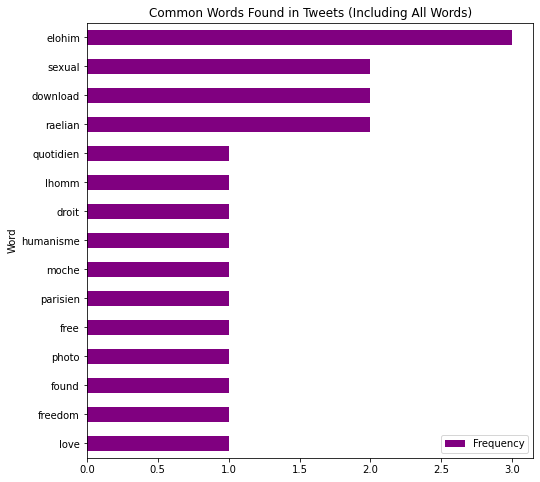

 
Most topics of the community
 
Milliardaires contrôlent le monde                   1
Interrogations sur les motivations de Bill Gates    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 48
 
                  Word  Frequency
0                droit          5
1            gredegumr          2
2        international          2
3               avocat          2
4             doctorer          1
5          contractuel          1
6       donnéesdesanté          1
7                  lia          1
8      droiteconomique          1
9              charger          1
10                  td          1
11       droitscponice          1
12              membre          1
13     lobservatoireep          1
14  maîtredeconférence          1
 


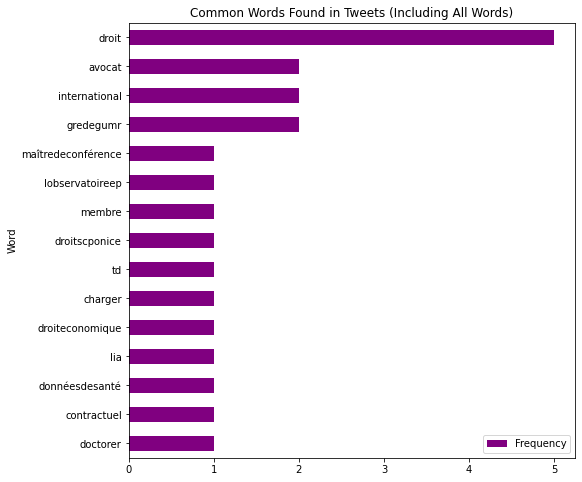

 
Most topics of the community
 
Pas de reprise normal sans vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 49
 
             Word  Frequency
0         digital          4
1        internet          3
2   communication          3
3      governance          2
4           cloud          2
5          policy          1
6         records          1
7      management          1
8       liverpool          1
9              fc          1
10           geek          1
11   photographie          1
12          linux          1
13          apple          1
14          iphon          1
 


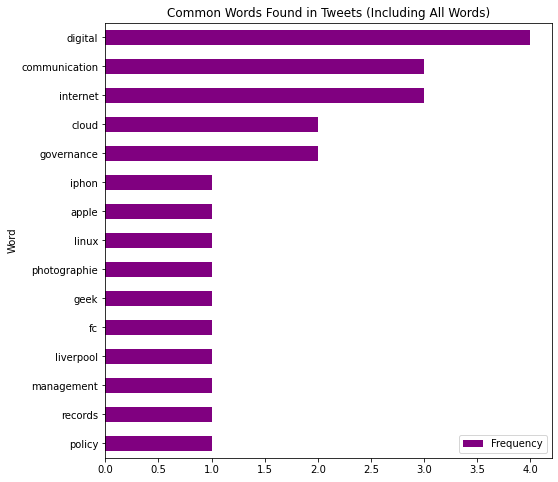

 
Most topics of the community
 
Conflits d'intérêts supposés de B. Gates    6
Puces traqueuses dans le vaccin             1
Incrédule par rapport à la Fake News        1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 50
 
                  Word  Frequency
0              trading          4
1               trader          3
2                stock          2
3            financier          2
4               bourse          2
5                swing          1
6       investisseurus          1
7               market          1
8             marathon          1
9             training          1
10              runner          1
11               jeune          1
12  couvreurzingueurni          1
13              gauche          1
14              droite          1
 


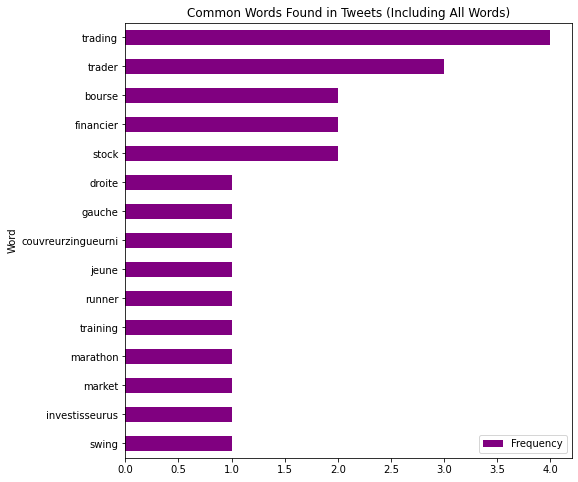

 
Most topics of the community
 
Milliardaires contrôlent le monde    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 51
 
                  Word  Frequency
0             politics          1
1            economics          1
2              finance          1
3                linfo          1
4             triomphe          1
5               lintox          1
6                  cas          1
7                doute          1
8             vérifier          1
9         stopintoxnow          1
10            fakenews          1
11        factchecking          1
12  contactstopintoxcm          1
 


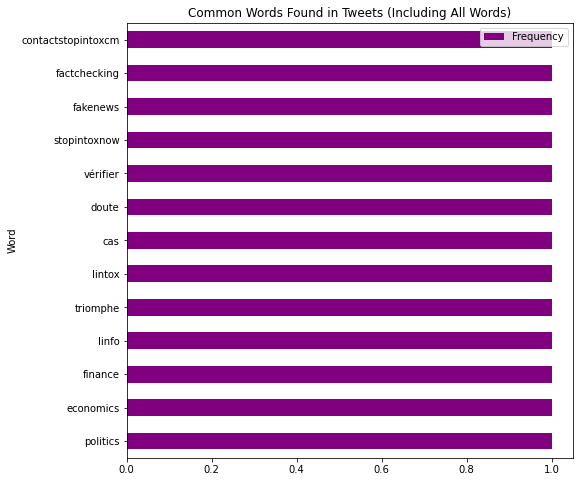

 
Most topics of the community
 
Ironie sur la fake news, moqueries    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 52
 
               Word  Frequency
0            christ          5
1             jésus          3
2              jour          2
3              jesu          2
4         apprendre          2
5              você          2
6           bonheur          1
7             grâce          1
8   maccompagneront          1
9               vie          1
10       jhabiterai          1
11           maison          1
12         léternel          1
13           jusquà          1
14              fin          1
 


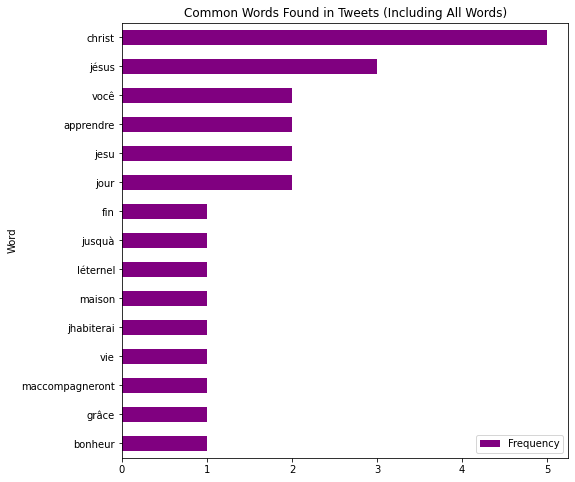

 
Most topics of the community
 
Les vaccinés sont du bétail                      1
Interrogations sur le développement du vaccin    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 53
 
            Word  Frequency
0          ecolo          1
1           cool          1
2   radioamateur          1
3         voyage          1
4   photographie          1
5        guitare          1
6            nai          1
7             tv          1
8        analizy          1
9     kryzysupln          1
10  polishzlotys          1
11         لنداء          1
12        الرحمن          1
13       frenchy          1
14        journo          1
 


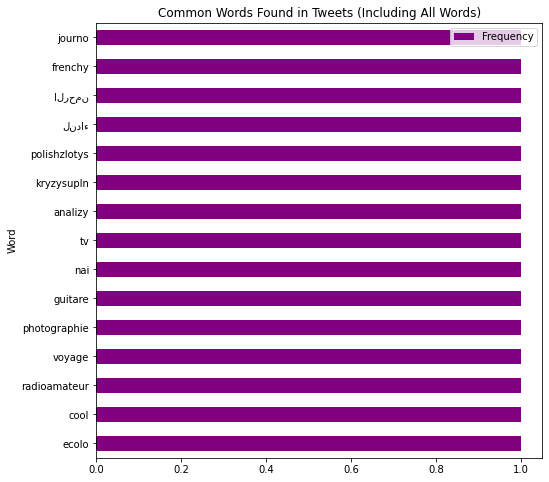

 
Most topics of the community
 
Marquage des populations    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 54
 
         Word  Frequency
0     liberty          2
1      safety          2
2    qrinière          1
3        lion          1
4         têt          1
5     patriot          1
6        give          1
7   essential          1
8      obtain          1
9      little          1
10  temporary          1
11    deserve          1
12    neither          1
13   benjamin          1
14   franklin          1
 


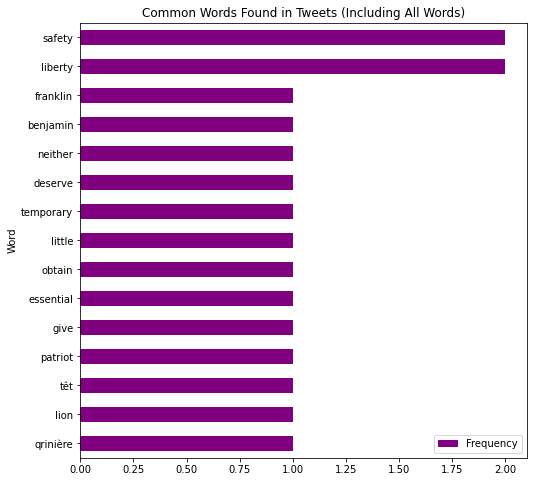

 
Most topics of the community
 
Milliardaires contrôlent le monde                                                                  1
Tweet en réaction aux propos \nde Juliette Binoche, actrice, qui \nadhère à fond à la Fake News    1
Name: topic_label, dtype: int64
 
      ********************
 
categorie 55
 
       Word  Frequency
0   opinion          2
1     right          2
2     liabl          2
3     wrong          2
4     based          1
5      true          1
6     story          1
7  disagree          1
 


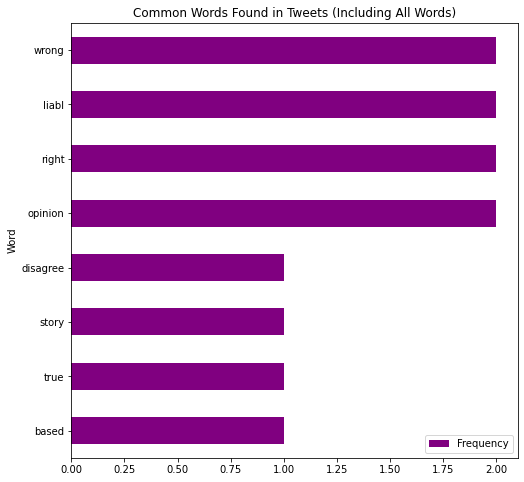

 
Most topics of the community
 
Series([], Name: topic_label, dtype: int64)
 
      ********************
 
categorie 56
 
         Word  Frequency
0    sortiesj          2
1        anti          1
2      macron          1
3     musique          1
4      animal          1
5   rencontre          1
6       entre          1
7        amie          1
8         ami          1
9        rire          1
10      plein          1
11    énergie          1
 


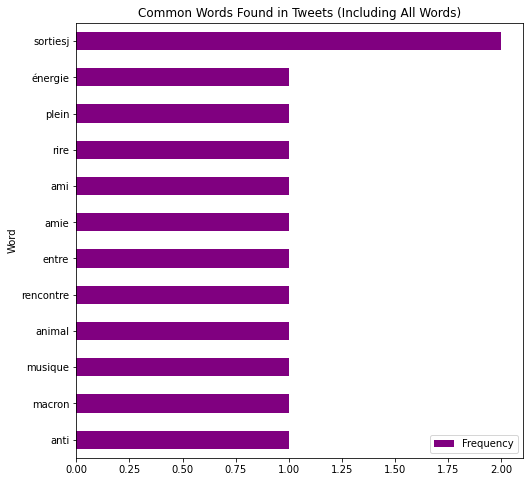

 
Most topics of the community
 
Puces traqueuses dans le vaccin    1
Name: topic_label, dtype: int64
 
      ********************


In [ ]:
# Get 15 topwords by community
numbers = np.sort(geoloc.community.unique())


for num in numbers:
    geo = geoloc[(geoloc['community'] == num)] 
    frequency = geo['description']
    word_count = Counter(" ".join(frequency).split()).most_common(15)
    word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
    topics= geo.topic_label.value_counts()
    print(' ')
    print(f'categorie {num}')
    print(' ')
    print(word_frequency)
    print(' ')
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot horizontal bar graph
    word_frequency.sort_values(by='Frequency').plot.barh(x='Word',
                      y='Frequency',
                      ax=ax,
                      color="purple")

    ax.set_title("Common Words Found in Tweets (Including All Words)")

    plt.show()
    print(' ')
    print('Most topics of the community')
    print(' ')
    print(topics)
    print(' ')
    print('      ********************')
    
    

In [ ]:
# Functions to get ngrams and their plots
def get_top_ngrams(corpus, ngram_range, stopwords_excluded= False, N= None):
    """
    Returns a dataframe of ngrams and their frequency
    corpus -- the series of amenity values of interest
    ngram_range -- the tuple of min and max ngram value
    stopwords_exclude -- take stopwords into account or not
    N -- pick top N ngrams
    """
    if stopwords_excluded:
        vec = CountVectorizer(ngram_range=ngram_range, stop_words=STOP_WORDS).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:N], columns=['word', 'frequency']).sort_values('frequency')

def plot_ngrams(community, figsize, N= None):
    """
    Returns a plot of 4 subplots: 2 bigram plots and 2 trigram plots.
    Including and excluding stop words
    """
    corpus = geoloc[geoloc['community'] == community]['description']
    bigrams_data = get_top_ngrams(corpus, ngram_range= (2,2), N= N)
    bigrams_data = get_top_ngrams(corpus, ngram_range= (2,2), stopwords_excluded= True, N= N)
    trigrams_data = get_top_ngrams(corpus, ngram_range= (3,3), N= N)
    trigrams_data = get_top_ngrams(corpus, ngram_range= (3,3), stopwords_excluded= True, N= N)
    df = [bigrams_data, bigrams_data, trigrams_data, trigrams_data]

    fig = plt.figure(figsize= figsize)
    layout = (2,2)
    bigrams_ax1 = plt.subplot2grid(layout, (0,0))
    bigrams_ax2 = plt.subplot2grid(layout, (0,1))
    trigrams_ax1 = plt.subplot2grid(layout, (1,0))
    trigrams_ax2 = plt.subplot2grid(layout, (1,1))

    bigrams_ax1.set_title(f'Top {N} bigrams mentioned in\n {community}, including stop words.')
    bigrams_ax2.set_title(f'Top {N} bigrams mentioned in\n {community}, excluding stop words.')
    trigrams_ax1.set_title(f'Top {N} trigrams mentioned in\n {community}, including stop words.')
    trigrams_ax2.set_title(f'Top {N} trigrams mentioned in\n {community}, excluding stop words.')
    
    axes = [bigrams_ax1, bigrams_ax2, trigrams_ax1, trigrams_ax2]

    for a, d in zip(axes, df):
        a.barh(d['word'], d['frequency'])
    sns.despine()
    plt.tight_layout()

def find_key_words(community, key_word):
    """ Returns unique phrases that contain certain key words in a section
    """
    word_list = []
    for a in amenity_list(community):
        if key_word in a:
            word_list.append(a)
        else:
            continue
    if len(word_list) > 0:
        return word_list
    else:
        return 'Words are not found'

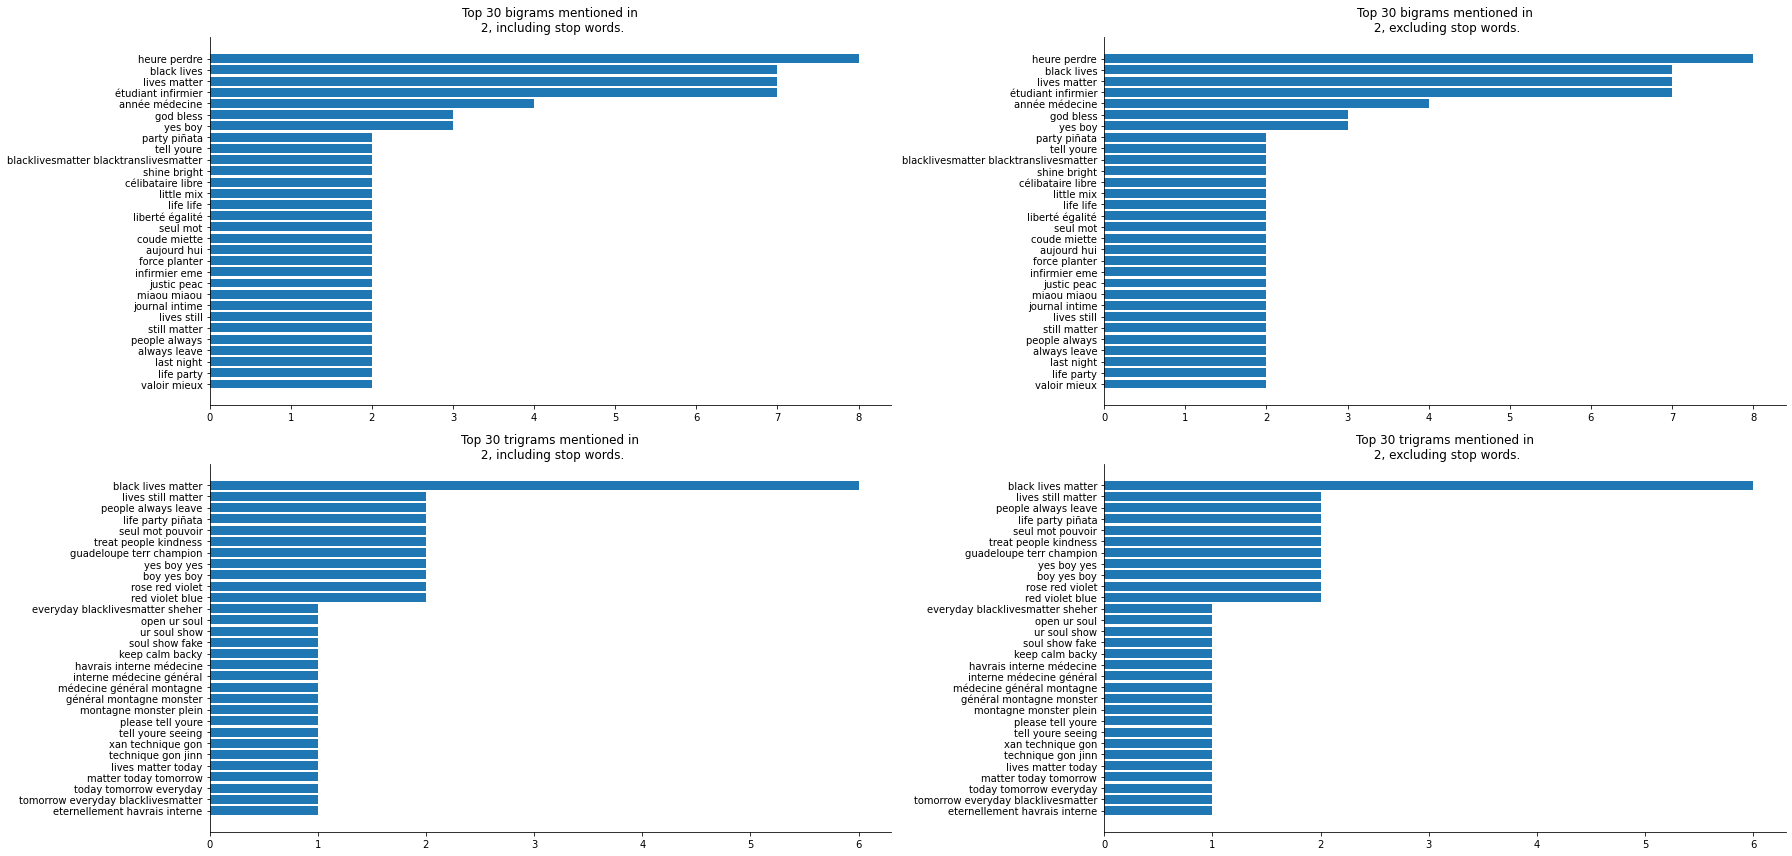

In [ ]:
plot_ngrams(2, (25,12), N=30)

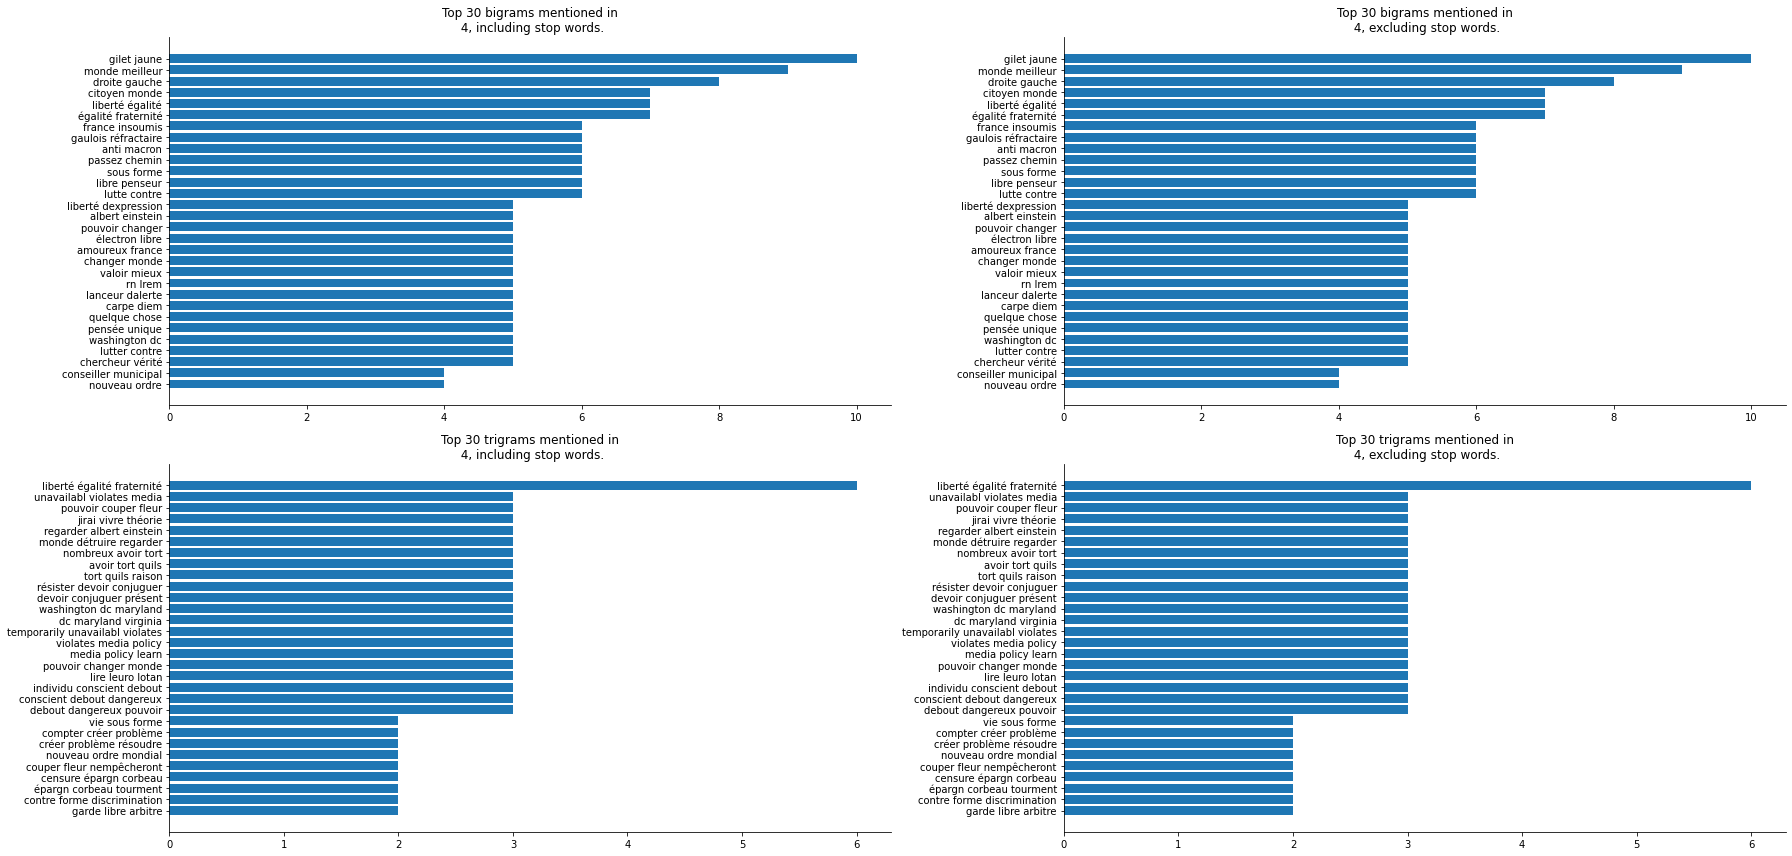

In [ ]:
plot_ngrams(4, (25,12), N=30)

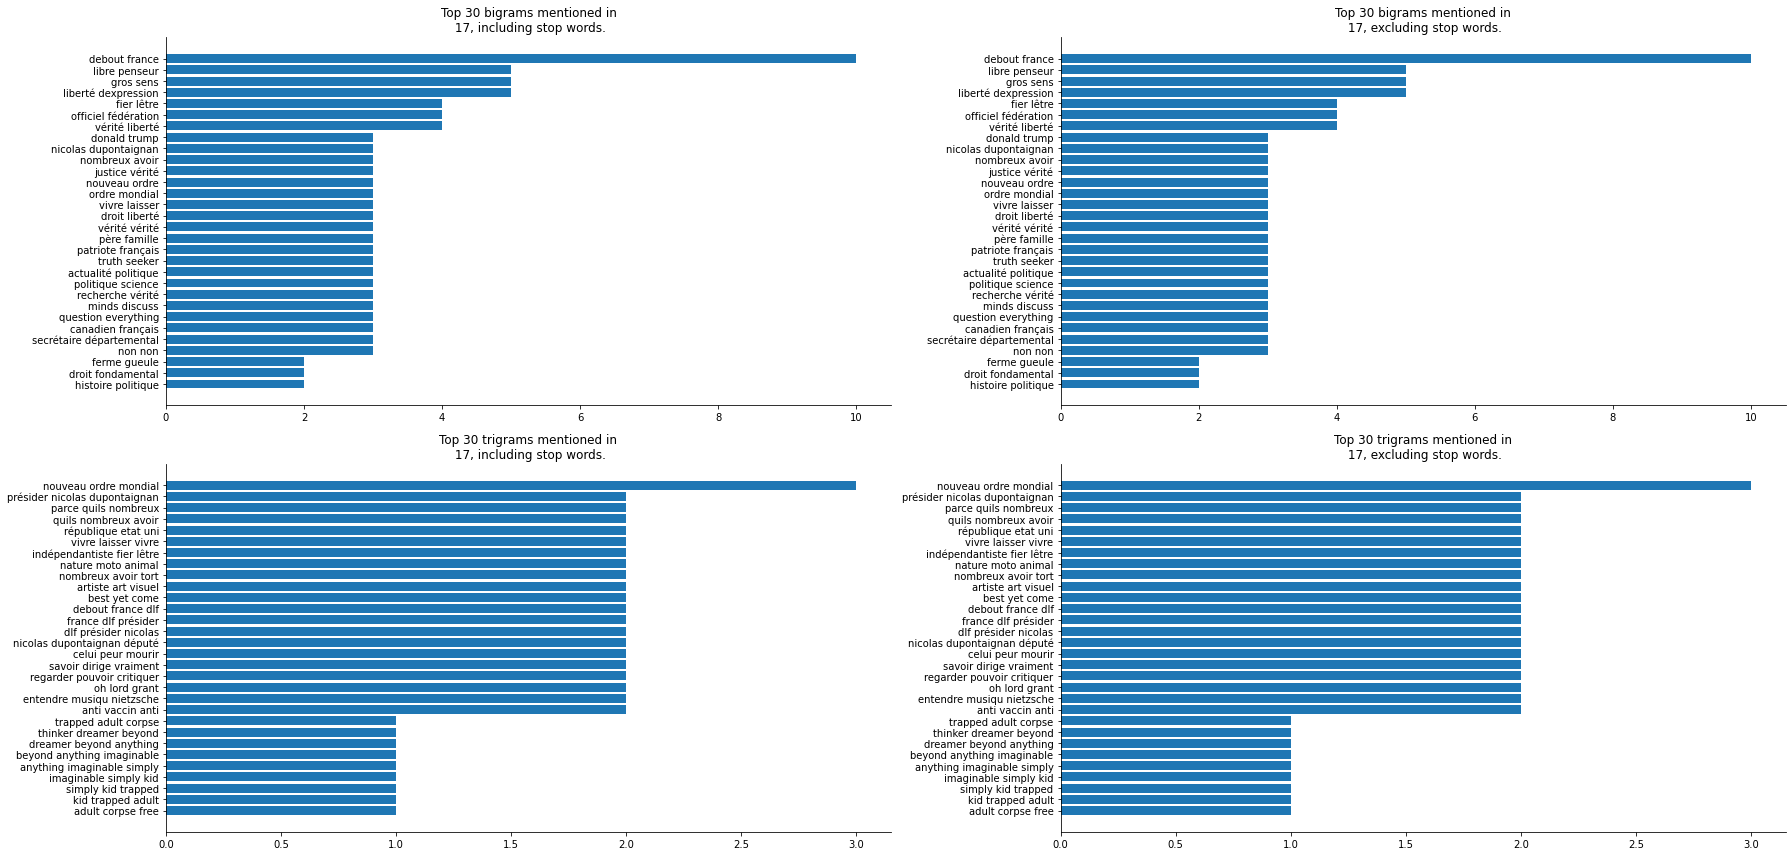

In [ ]:
plot_ngrams(17, (25,12), N=30)

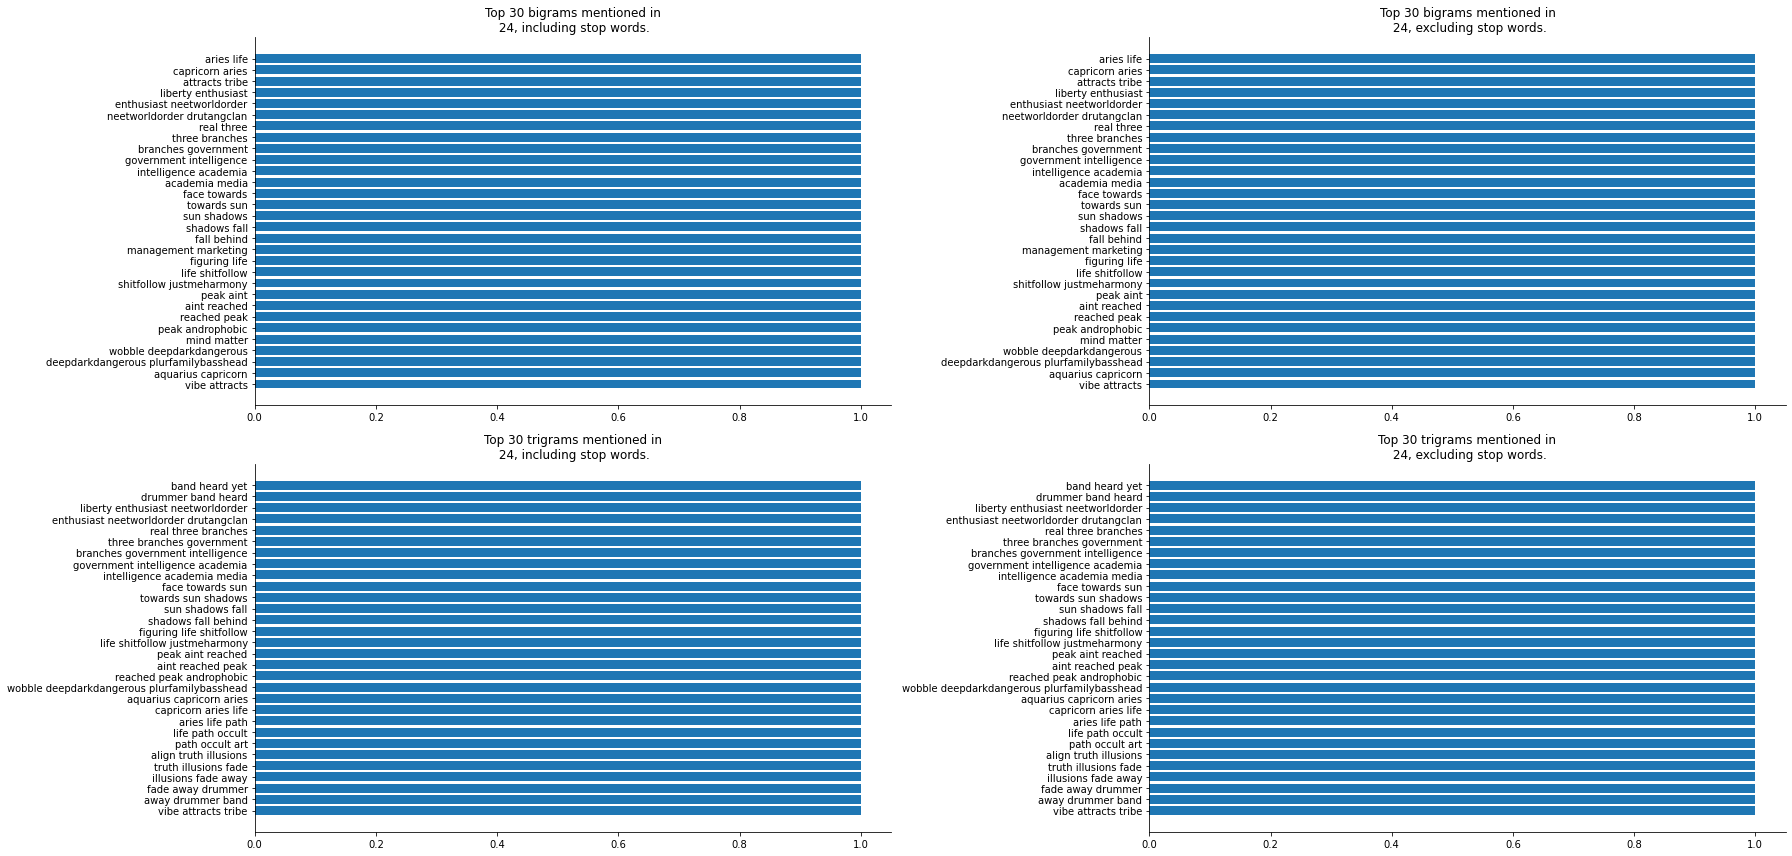

In [ ]:
plot_ngrams(24, (25,12), N=30)